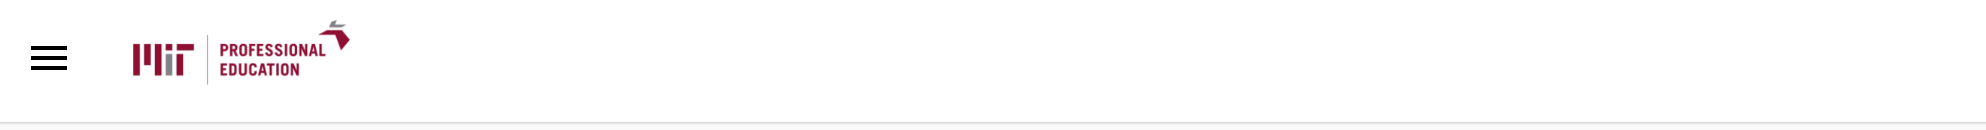

<div style="background-image: linear-gradient(rgb(150,189,255),white,white);font-family: 'Segoe UI';font-size:'25'">
    
## CAPSTONE project submission   

  >by, 
  Sudhir Behera
    


    

# **Loan Default Prediction**

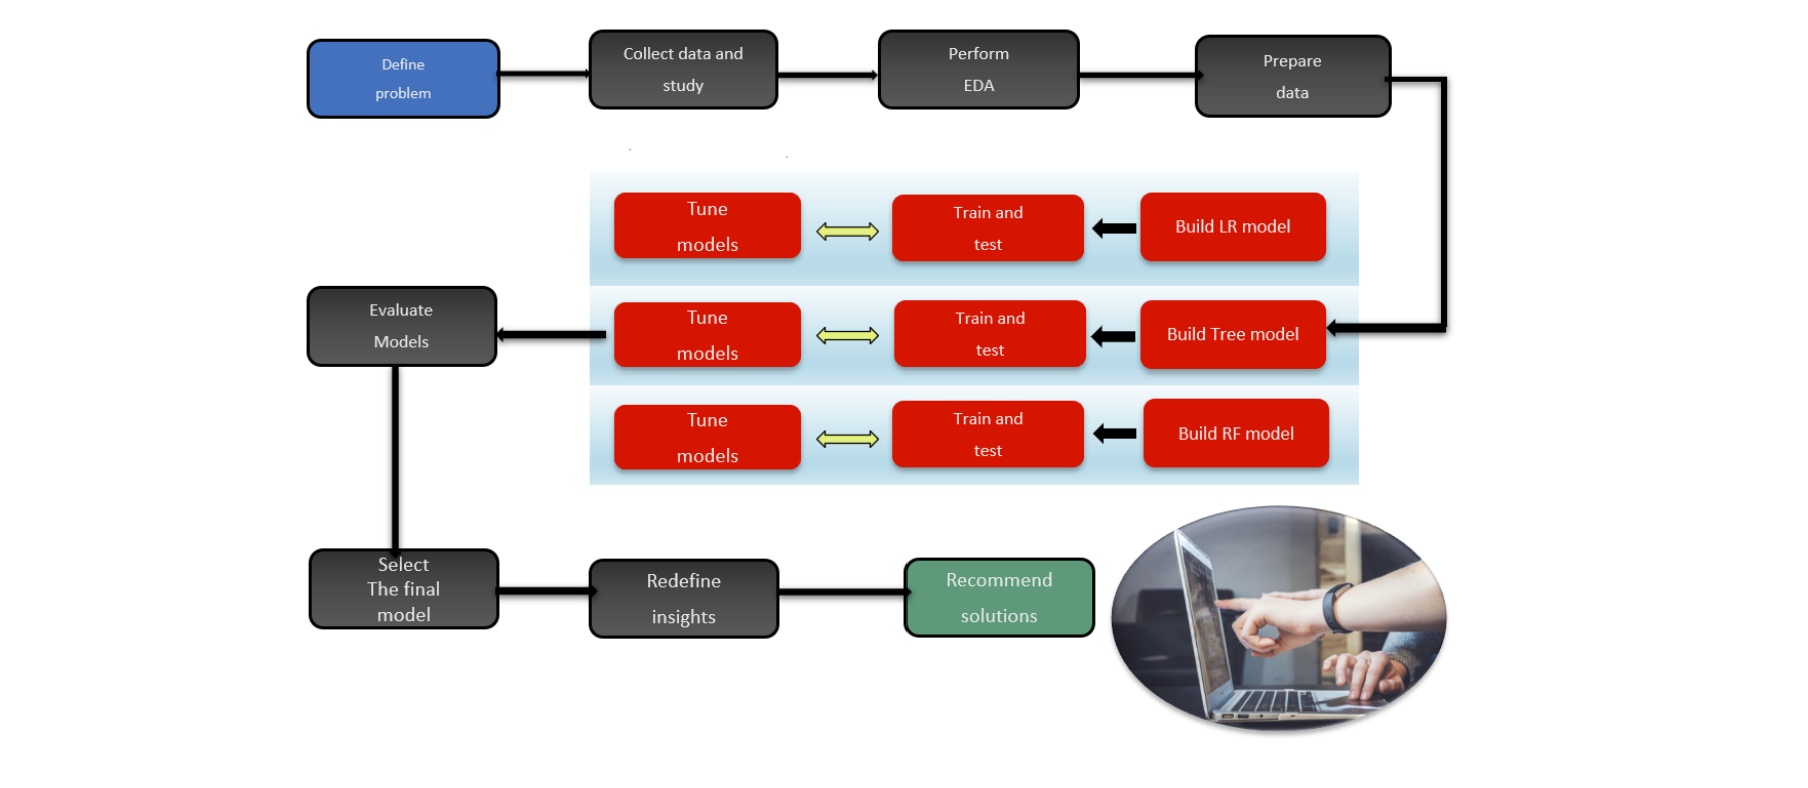

<div style="background-image: linear-gradient(white,rgb(150,189,255),rgb(300,289,155));font-family: 'Segoe UI';font-size:'25'">

## **Problem Definition**   
    
   A bank's consumer credit department aims to **_simplify_** the decision-making process for **_home equity_**
lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's
guidelines to establish an empirically derived and statistically sound model for credit scoring. The
model will be based on the data obtained via the existing loan underwriting process from recent
applicants who have been given credit. The model will be built from predictive **_modeling techniques_**,
but the model created must be **_interpretable_** enough to provide a justification for any adverse
behavior (rejections).
### **The Context:**

A significant portion of retail bank profits is derived from the interest earned on home loans, which are typically borrowed by customers with regular income or high earnings. One of the biggest **concerns** for banks is the **_occurrence_** of defaulters, as "**_bad_**" loans, commonly known as non-performing assets (NPAs), can significantly erode their profits. Thus, it is crucial for banks to exercise prudence when approving loans for their customer base.  

The loan approval process is a complex undertaking. During this process, banks scrutinize various aspects of the loan application to assess the applicant's creditworthiness. Traditionally, this evaluation has relied on manual examination, which not only demands significant effort but also leaves room for human _error_ and _biases_ in judgment. Some banks have attempted to introduce _heuristics_ to automate the process, but the emergence of data science and machine learning has sparked a shift in focus.  

With the advent of _data science_ and **machine** learning techniques, the emphasis has now shifted toward developing machines capable of learning the loan approval process. The aim is to eliminate biases and enhance efficiency. However, it is crucial to ensure that these machines do not inherit the biases that were previously present due to human approval processes.  

By leveraging _data science_ and machine learning algorithms, banks can create a more objective and streamlined loan approval process. This technology-driven approach holds the potential to minimize human error and biases while efficiently assessing the creditworthiness of loan applicants. Striking the right balance between automation and fairness is a key consideration to ensure a robust and reliable loan approval system in the banking industry.  


### **The objective:**

  Utilizing advanced Machine Learning techniques like logistic regression and tree-based algorithms to construct an optimal customer profile that predicts the likelihood of loan default based on the given _Home Equity dataset_(HMEQ).

### **The key questions:**
    
- Can you identify 
    * patterns and relationships and  
    * key indicators that contribute to loan defaults?.
- What _insights_ and _solutions_ you can provide to the bank to _**minimize** the risk of future loan defaults_?.


### **The problem formulation**:

   By employing logistic regression, a statistical model, and tree-based algorithms, which include decision trees, random forests banks can analyze and extract valuable insights from HMEQ dataset. The **structure** of the project  divided into these phases.   
   * _Loading_ the data.   
   * _Exploring_ the data.   
   * Data _Cleansing_ and _Feature Selection_.   
   * _Build, train and test_ machine learning models.   
 <br>


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [201]:
import numpy as np # The fundamental package for scientific computing with Python.
import pandas as pd # For data analysis and manipulation. 
import matplotlib.pyplot as plt # To create figures and plots. 
import matplotlib as mpl # Visualizations in Python.
import seaborn as sns # statistical data visualization.
from sklearn.model_selection import train_test_split
# Packages and libraries for model building.
from sklearn import tree # Machine learning. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
# Metrics packages to evaluate models. 
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn import metrics 
# Hyperparameter tuning. 
from sklearn.model_selection import GridSearchCV
# control warnings.
import warnings 
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

<div style="background-image: linear-gradient(rgb(200,100,200), white);font-family: 'Segoe UI';font-size:'25'">
<h3> User defined classes and functions.</h3>

**plotGraph,** has follwing methods. <br> 

  * **plotBar(ds,x,y,title)** Uses seaborn module to generate bar plot graph.  
  * **plotHist(ds,x,hue)** Uses seaborn module to generate hist plot graph.  
  * **countPlot(ds,f):** Uses seaborn module to generate count plot graph.  
    
  * **plotBox(ds,f,axes):** Uses seaborn module to generate box plot graph. 
    
  * **plotHeatmap(ds,size):** Uses seaborn module to generate heatmap matrix. 
    
  * **plotDist(ds,i,axes):** Uses seaborn module to generate distribution graph. 
    
  * **plotScatter(x,y,c):** Uses seaborn module to generate scatter plot.  
    
  * **plotPie(ds_size,i):** Generates pie plots.   
    
  * **plotPairs(ds):** Uses seaborn module to generate pair plot.
    
  * **plotLine(x,y,x_1,y_1):** Uses seaborn module to plot line chart.   

### Loading the dataset.

In [202]:
class plotGraph:
    @staticmethod 
    def plotBar(ds,x,y,title):
        sns.barplot(data=ds, x=x, y=y,title=title)
    @staticmethod
    def plotCount(ds,x,order,hue_parm, palette,title):
        if len(hue_parm) > 0:
            ax = sns.countplot(data=df,x=x,order=order, palette=palette, hue=hue_parm)
        else:
            ax = sns.countplot(data=df,x=x,order=order, palette=palette)
        for c in ax.containers:
            ax.set(xlabel ="", ylabel = "", title = title)
            ax.set_frame_on(False)
            total = len(ds[x])
            abs_values = df[x].value_counts(ascending=False)
            rel_values = df[x].value_counts(ascending=False, normalize=True).values * 100
            lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
            ax.bar_label(c, labels=lbls) 
    @staticmethod
    def plotBox(ds,lst,f,axes):
        ax=axes
        sns.boxplot(data=ds,x=lst[f],ax=axes,color='grey')
        ax.axvline(ds[lst[f]].mean(), c='k', ls='-', lw=2.5)
        ax.axvline(ds[lst[f]].median(), c='orange', ls='--', lw=2.5)
    @staticmethod 
    def plotHist(ds,x,hue):
        ax = sns.histplot(data=ds,x=x,hue=hue,bins=5,palette=['red', 'green', 'blue'])
    @staticmethod    
    def plotHeatmap(ds,size):
        if size == 'small':
            plt.figure(figsize = (3, 2))
            sns.heatmap(ds, annot = True, fmt = '0.2f', cmap='Greys',linewidths=0.30)
        else:
            plt.figure(figsize = (8, 5))
            sns.heatmap(ds, annot = True, vmax=1, vmin=-1, square=True, mask= np.triu(df.corr(), 1), fmt = '0.2f', cmap='Greys',linewidths=0.30)
    @staticmethod    
    def plotDist(ds,f,axes):
        ax=axes
        ax.axvline(ds[f].mean(), c='k', ls='-', lw=2.5)
        ax.axvline(ds[f].median(), c='orange', ls='--', lw=2.5)
        sns.distplot(ds[f], ax=axes, color="grey", bins=10)
    @staticmethod     
    def plotScatter(x,y,hue):
        sns.scatterplot(x=x, y=y, marker='o',s=25, hue=hue, legend=True)
    @staticmethod    
    def plotPie(ds_size,i):
        explode = (0, 0.1, 0, 0)
        pct_label =  lambda x: f'{x:.0f}%\n({(x/100)*sum(ds_size):.0f})'
        v_counts = ds_size.value_counts()
        ds_size.plot(ax=axe, kind='pie', colors=('k', 'brown', 'grey'), textprops={'color':"b",'fontsize':10},
                     autopct=pct_label, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'w' })   
    @staticmethod
    def plotPairs(ds):
         sns.pairplot(ds,
                 markers="o",
                 hue='status')
    @staticmethod
    def plotLine(x,y,x_1,y_1):
        plt.figure(figsize = (10, 4))
        ax = sns.lineplot(x=x_1, y=y_1, color='green',marker='*', label = "successfully converted", linestyle="-.")
        ax = sns.lineplot(x=x, y=y, color='brown',marker='*', label = "total interactions")
        sns.move_legend(ax, "upper center")
        for xy in zip(x, y):
            ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
        for xy in zip(x_1, y_1):
            ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')  

In [203]:
# Creates the class object to plot various graphs. 
gr = plotGraph()

In [204]:
# Setting the graph style.
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 2.5})

In [205]:
# positioning the output. 
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [206]:
data = pd.read_csv(r'C:\Users\fricle\Great_learning\Projects\DATA\hmeq.csv')

In [207]:
df = data.copy()

In [208]:
r,c = df.shape
print('There are {},rows and {}, columns in the data set.'.format(r,c))

There are 5960,rows and 13, columns in the data set.


In [209]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [211]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [212]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [213]:
df.duplicated().value_counts()

False    5960
dtype: int64

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - The dataset **5960** rows and **13** columns.  
 - REASON and JOB are of **_obeject_** type.       
 - LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO and DEBTINC are of **_numeric_** data type.
 - "BAD" is the **_target variale_** and of **binary** type.    
 - "BAD" and "LOAN" do not have **_missing_** values.
 - There are no **_duplicate_** rows.
 - Rest of the columns have _few_ **missing** values those we shall analyze in details later while **_treating_**
   missing values. 


### Distribution of Target variable. 

"**BAD**" is a binary variable as it has two possible values: 

 0 for **_repaid_** the loan and   
 1 for a **_defaulted_** on loan.   

Our focus is class **_1_**. 

Let us check the distribuion of it.

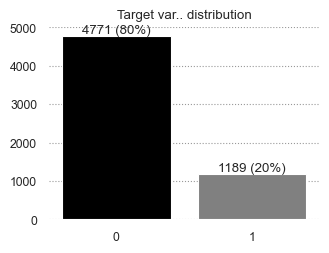

In [214]:
x='BAD'
plt.figure(figsize = (3.5, 2.5))
palette = ['black','grey']
order=df[x].value_counts().index 
title = 'Target var.. distribution'
gr.plotCount(df,x,order,"",palette,title)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

* There is 80-20 split in favour of class **_0_**.  
* 4771 customers have repaid the loan ( class 0) and  
  1189 customers have defaulted on the loan.  
    

## Summary Statistics

In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>  
    
- BAD: Is a categorical feature. Ignore this.   
- LOAN: Average loan is 18608, min loan amout is 1100.00, max loan is 89900.00, 25% is 11100.00 and 75% is 23300.00.  
- MORTDUE: Average MORTDUE is 73760.82, min MORTDUE is 2063.00, max MORTDUE is 399550.00, 25% is 46276.00 and 75% is   91488.00.   
    
   For other numerical features you can find these informaion from table above.   

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

Q1. Let us find the range of values for the loan amount variable "LOAN"

In [216]:
df['LOAN'].max() - df['LOAN'].min()

88800

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>  

  The range of the variable _LOAN_ is 88800.  
     

Q2: How does the distribution of years at present job "YOJ" vary across the dataset?

<Axes: xlabel='YOJ'>

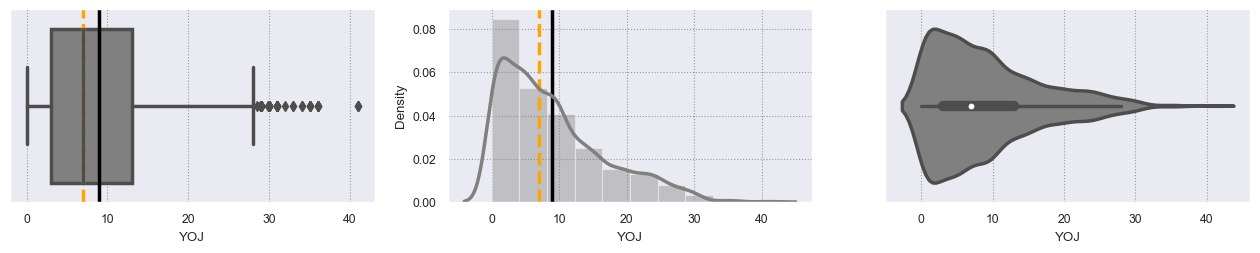

In [217]:
plt.figure(figsize = (16, 2.5))
lst =['YOJ']
axes = plt.subplot(1, 3,1)
gr.plotBox(df,lst,0,axes)
axes = plt.subplot(1, 3,2)
gr.plotDist(df,'YOJ',axes)
axes = plt.subplot(1, 3,3)
sns.violinplot(data=df,x='YOJ',color='grey')


In [218]:
print( 'mean,', round(df.YOJ.mean()))
print( 'median,', round(df.YOJ.median()))      
print( 'min,', round(df.YOJ.min()))
print( 'max,', round(df.YOJ.max()))

mean, 9
median, 7
min, 0
max, 41


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

- Average years on current job is 9.
- Median years on current job is 7. 
- Many have not completed even a year at current job.
- Maximum years on current job is 41. 
- You can see from the boxplot, density plot and violin plot that the data is right skewed on YOJ. 
- There are many **_outliers_** , those will be treated under "Outlier Treatment" section later. 


Q3: Let us find out unique categories are there in the REASON variable?

In [219]:
print(df['REASON'].unique())

['HomeImp' nan 'DebtCon']


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

There are three cataegories   
    
 - HomeImp 
 - nan  
 - DebtCon 
    
_"nan"_ is due to __many missing__ values , those will be treated later in this document.

Q4: What is the most common category in the JOB variable?

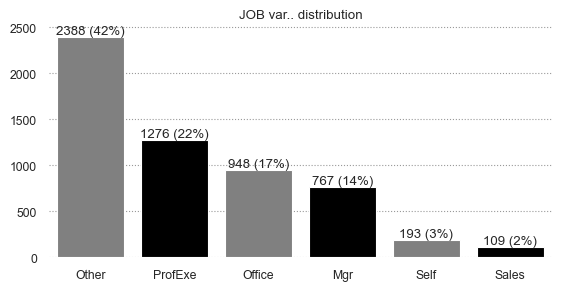

In [220]:
x='JOB'
plt.figure(figsize = (6.5, 3))
palette = ['grey','black']
order=df[x].value_counts().index 
title = 'JOB var.. distribution'
gr.plotCount(df,x,order,'',palette,title)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

**_"Other"_** is the most common category in the JOB variable.   


Q6: Do applicants who default have a significantly different loan amount compared to those who repay their loan?

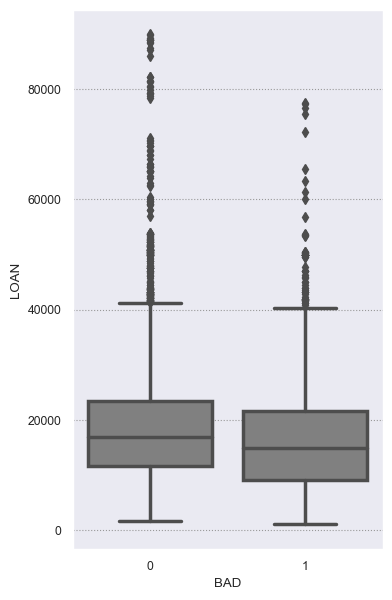

In [221]:
plt.figure(figsize = (4, 7))
x = 'LOAN'
hue = 'BAD'
ax = sns.boxplot(data=df,y='LOAN',x="BAD",color='grey')

In [222]:
print(round(df.LOAN.corr(df['BAD']),2))

-0.08


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
 

- It seems there is very slight _negaive correlation_ of aprox -0.08 exist between LOAN and BAD variable.  
  Which means custmers with larger loan amount **_slightly_** do better in repaying the loan. 
- Also, from the boxplot you could see that **_mean_** of class 0 is higer than the mean of class 1. Which   
  reaffirms larger loan amount performs better on loan replayment. 
    
    

Q7:is there a correlation between the value of the property and the loan default rate?

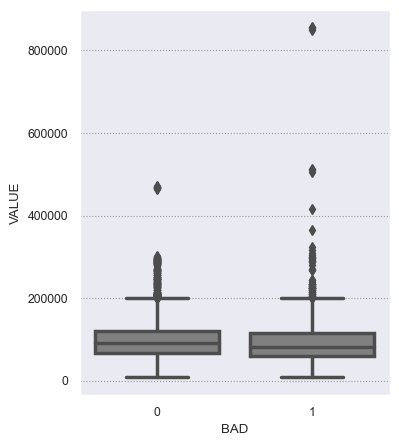

In [223]:
plt.figure(figsize = (4, 5))
y = 'VALUE'
x = 'BAD'
ax = sns.boxplot(data=df,y=y,x="BAD",color='grey')

In [224]:
print(round(df.VALUE.corr(df['BAD']),2))

-0.03


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
 

- It seems there is very slight _negaive correlation_ of aprox -0.03 exist between VALUE and BAD variable.  
  Which means customers with higher property VALUE  **_slightly_** do better in repaying the loan. 
- Also, from the boxplot you could see that **_mean_** of class 0 is higer than the mean of class 1. Which   
  reaffirms larger VALUE performs better on loan replayment. 

Q8: Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

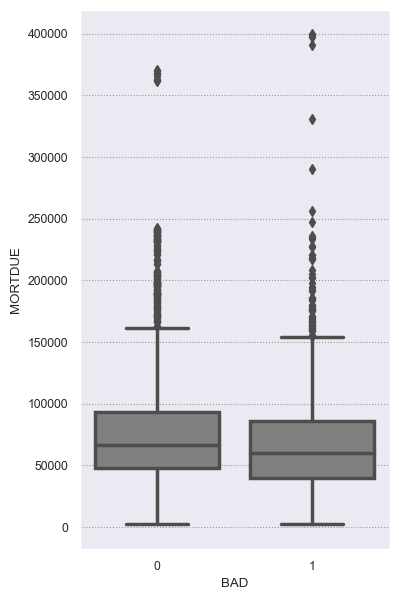

In [225]:
plt.figure(figsize = (4, 7))
y = 'MORTDUE'
x = 'BAD'
ax = sns.boxplot(data=df,y=y,x="BAD",color='grey')

In [226]:
print(round(df.MORTDUE.corr(df['BAD']),2))

-0.05


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
 

- It seems there is very slight _negaive correlation_ of aprox -0.05 exist between MORTDUE and BAD variable.  
  Which means custmers with larger MORTDUE amount **_slightly_** do better in repaying the loan. 
- Also, from the boxplot you could see that mean of class 0 is higer than the mean of class 1. Which   
  reaffirms larger MORTDUE amount performs better on loan replayment. 

### **Univariate Analysis**


#### Checking numerical columns distribution and outliers.

In [227]:
numericals = df.select_dtypes(['number']).columns.tolist()

In [228]:
print(numericals)

['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


<Figure size 1200x400 with 0 Axes>

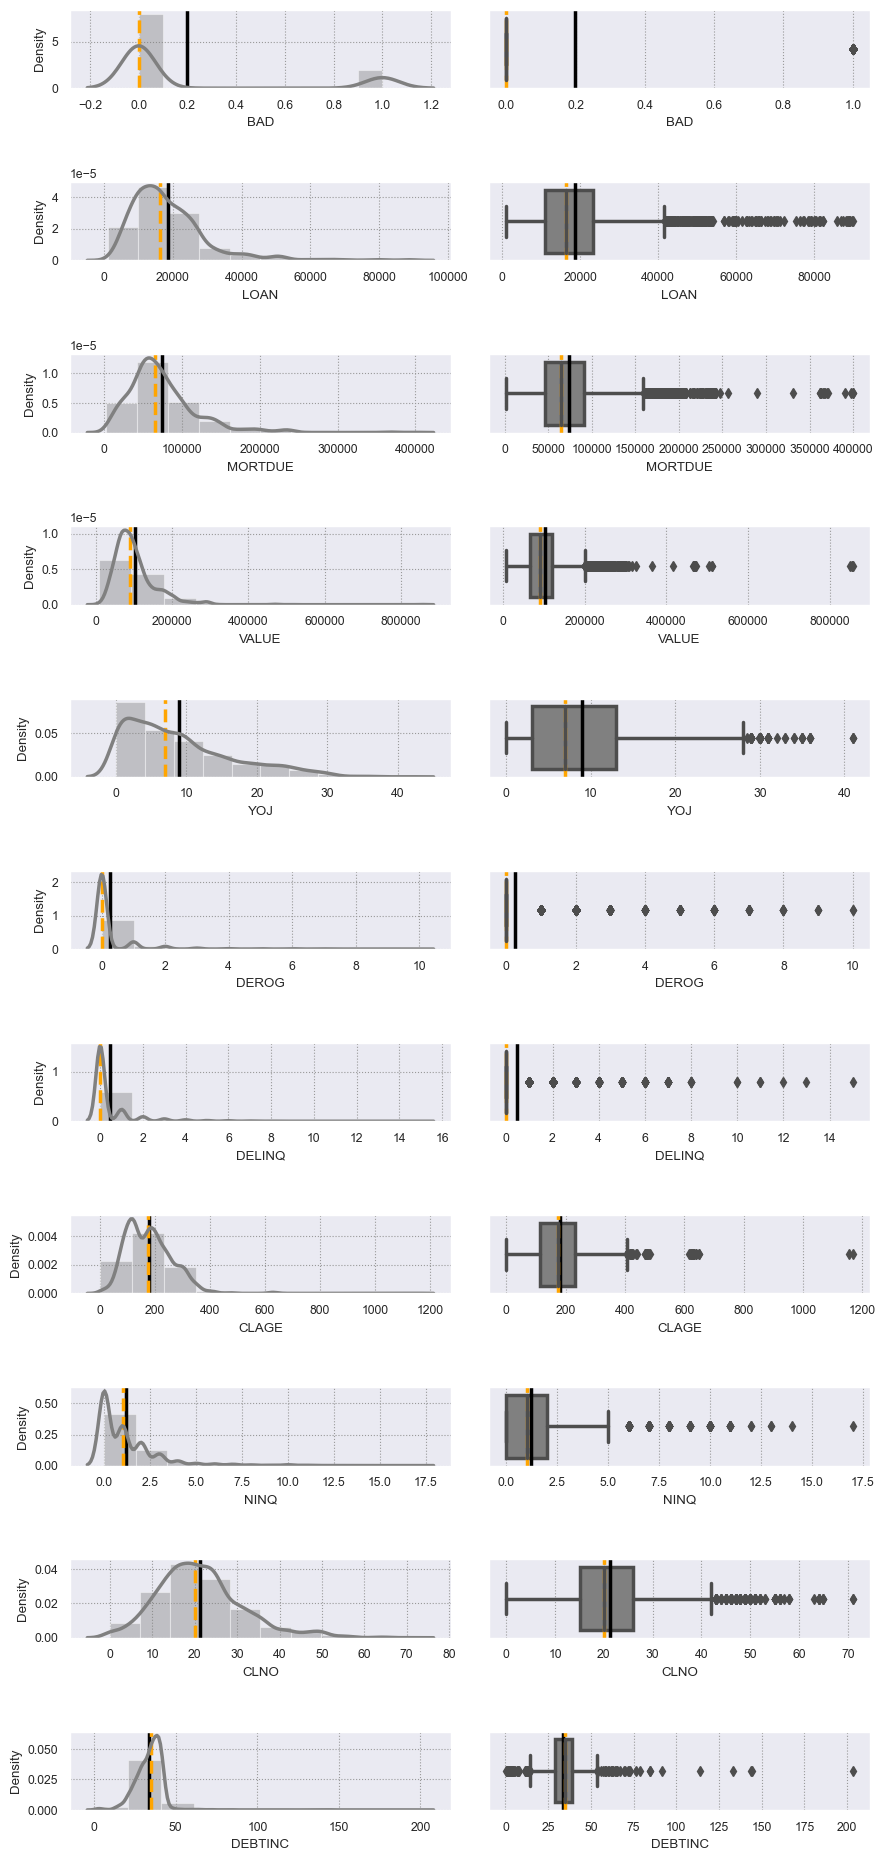

In [229]:
plt.figure(figsize = (12, 4))
fig, axes = plt.subplots(11, 2, figsize=(10, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
for i, c in enumerate(numericals):
    gr.plotDist(df,c,axes[i,0])   
    gr.plotBox(df,numericals,i,axes[i,1])

In [230]:
#obtian mean , median, mode of each numeric feature.
list_stat = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for i, c in enumerate(list_stat):
    print(c)
    print("_________")         
    print("mean", df[c].mean())
    print("median", df[c].median())
    print(".25 quantile," ,df[c].quantile(0.25))
    print(".75 quantile,", df[c].quantile(0.75))
    print(f"Unique values: {df[c].nunique()}")
    print(f"Variance: {df[c].var()}")
    print("")

LOAN
_________
mean 18607.96979865772
median 16300.0
.25 quantile, 11100.0
.75 quantile, 23300.0
Unique values: 540
Variance: 125607617.29057954

MORTDUE
_________
mean 73760.817199559
median 65019.0
.25 quantile, 46276.0
.75 quantile, 91488.0
Unique values: 5053
Variance: 1976479038.7570329

VALUE
_________
mean 101776.04874145007
median 89235.5
.25 quantile, 66075.5
.75 quantile, 119824.25
Unique values: 5381
Variance: 3293127210.650202

YOJ
_________
mean 8.922268135904499
median 7.0
.25 quantile, 3.0
.75 quantile, 13.0
Unique values: 99
Variance: 57.365207106634664

DEROG
_________
mean 0.2545696877380046
median 0.0
.25 quantile, 0.0
.75 quantile, 0.0
Unique values: 11
Variance: 0.715795149018118

DELINQ
_________
mean 0.4494423791821561
median 0.0
.25 quantile, 0.0
.75 quantile, 0.0
Unique values: 14
Variance: 1.2707284489937496

CLAGE
_________
mean 179.76627518656605
median 173.46666667
.25 quantile, 115.11670223
.75 quantile, 231.56227814
Unique values: 5314
Variance: 7363.3718

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   
    
- BAD is a binary variable we can ignore this.   
- Orange line shows the median and blak line shows the mean. 
- Most variables have _outliers_ would require treatment.  
- Most varibles are very _unbalanced_ and _right-skewed_.   

#### Checking categorical columns' distribution.

In [231]:
categories = df.select_dtypes(['object']).columns.tolist()

In [232]:
print(categories)

['REASON', 'JOB']


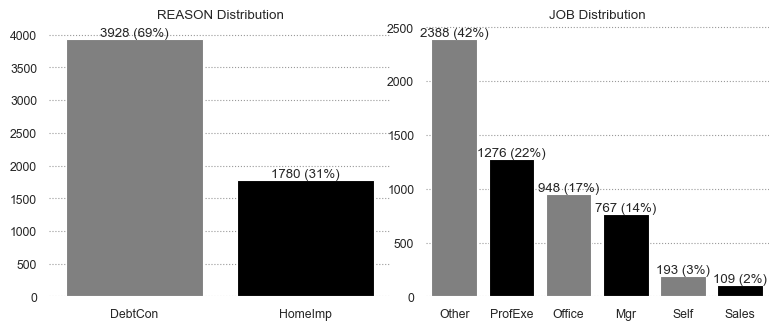

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
for i, c in enumerate(categories):
    plt.subplot(1, 2,i+1)
    order=df[c].value_counts().index 
    title = c + ' Distribution'   
    gr.plotCount(df,c,order,"",palette,title)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>  
 
Distribution of **REASON**    
 - Debt consolidation loans at 69% of the total loans granted. Followed by..
 - loan for home improvement is at 2nd place with 31% of the share. 
    
Distribution of **JOB**    
 - Jobs of 'Other' category is highest at 42% of total customers.  
 - ProfExe at 22%.
 - Office at 17%.
 - Mgr at 14%.
 - Self at 3%.
 - Sales at 2%.  
        

### **Bivariate Analysis**

In [234]:
df.groupby(['BAD', 'REASON'])['BAD'].aggregate('count').unstack()

REASON,DebtCon,HomeImp
BAD,,
0,3183,1384
1,745,396


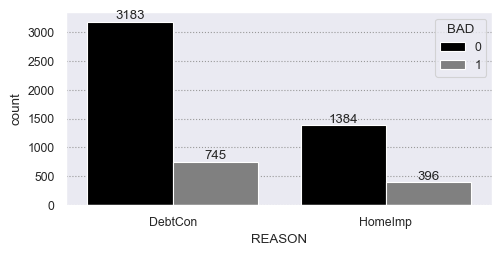

In [235]:
x='REASON'
hue='BAD'
plt.figure(figsize = (5.5, 2.5))
palette = ['black','grey']
order=df[x].value_counts().index 
title = 'Target var.. distribution'
ax = sns.countplot(data=df,x=x,order=order,hue=hue,palette=palette)
for container in ax.containers:
    ax.bar_label(container)

In [236]:
print("DebtCon default rate,", str(round((745/(3183+745))*100))+' %')
print("HomeImp default rate,", str(round((396/(1384+396))*100))+' %')

DebtCon default rate, 19 %
HomeImp default rate, 22 %


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>  
 
- Loans on **_home improvement_** has higher defualt rate compared to loans on debt consolidation.

In [237]:
df.groupby(['BAD', 'JOB'])['BAD'].aggregate('count').unstack()

JOB,Mgr,Office,Other,ProfExe,Sales,Self
BAD,,,,,,
0,588,823,1834,1064,71,135
1,179,125,554,212,38,58


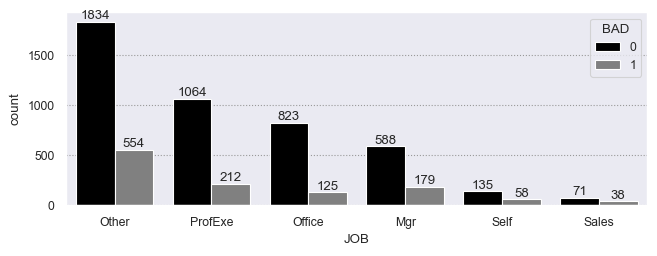

In [238]:
x='JOB'
hue='BAD'
plt.figure(figsize = (7.5, 2.5))
#palette = ['lightgreen','skyblue', 'grey','red','orange','limegreen','darkgreen','royalblue','navy']
palette = ['black','grey']
order=df[x].value_counts().index 
title = 'Target var.. distribution'
ax = sns.countplot(data=df,x=x,order=order,hue=hue,palette=palette)
for container in ax.containers:
    ax.bar_label(container)

In [239]:
print("Other: default rate,", str(round((554/(1834+554))*100))+' %')
print("ProfExe: default rate,", str(round((212/(1064+212))*100))+' %')
print("Office: default rate,", str(round((125/(823+125))*100))+' %')
print("Mgr: default rate,", str(round((179/(588+179))*100))+' %')
print("Self: default rate,", str(round((58/(135+58))*100))+' %')
print("Sales: default rate,", str(round((38/(71+38))*100))+' %')

Other: default rate, 23 %
ProfExe: default rate, 17 %
Office: default rate, 13 %
Mgr: default rate, 23 %
Self: default rate, 30 %
Sales: default rate, 35 %


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>  
 
- Customer with **_Office_** job have lowest default rate.
- Customer with **_Sales_** job have the highest default rate.   

#### Let us find the corelations between features

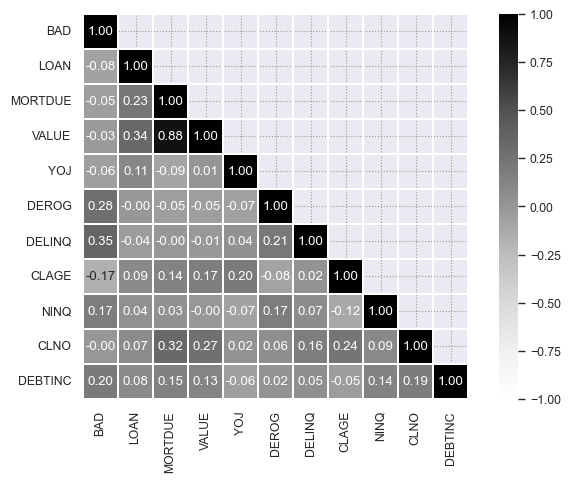

In [240]:
gr.plotHeatmap(df.corr(),'large')

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   
    
**possitive correlations**   
  > - _VALUE_ **and** _MORTDUE_  
  > - _DELINQ_ **and** _BAD_   
  > - _VALUE_ **and** _LOAN_   
  > - _MORTDUE_ **and** _CLNO_   
  > - _DEROG_ **and** _BAD_   
  > - _CLNO_ **and** _CLAGE_    
  > - _CLNO_ **and** _VALUE_   
  > - _DEBTINC_ **and** _BAD_    
      
   
**negative correlations** 
  > - _CLAGE_ **and** _BAD_    
  > - _CLAGE_ **and** _NINQ_    
  > - _DEBTINC_ **and** _YOJ_    
  > - _MORTDUE_ **and** _YOJ_     
  > - _LOAN_ **and** _BAD_     
  > - _DEBTINC_ **and** _CLAGE_ 
  > - _VALUE_ **and** _BAD_
  > - _MORTDUE_ **and** _BAD_    

### **Multivariate Analysis**

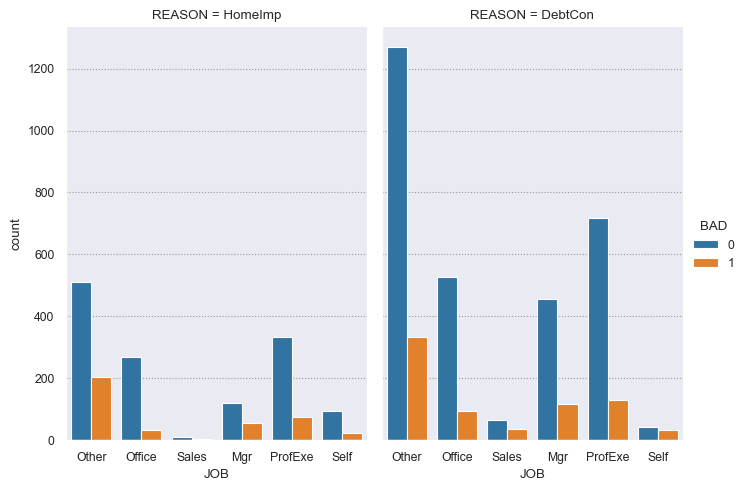

In [241]:
sns.catplot(x="JOB", hue="BAD", col="REASON", data=df, kind="count",
                height=5, aspect=.7);

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

 
**Home improvement**  
- Majority  "home improvement" mortgage borrowers are in _"Other"_ JOB category.   
  also, seems **_defult_** rate is very high.
- Professional executives (ProfExe), Office jobers and Sales profs have low default rate.  
    
**Debt Consolidation**  
    
- Majority  "debt consolidation" mortgage borrowers are in _"Other"_ JOB category too.  
  but their default rate  seems better than thos who taken "home improvement" loan    
  for the same job category. 
- Here too professional executives (ProfExe) and people with Office jobs have low default rate.  
- "Sales" and "Self employed" customers have very high default rate though not many of them taken loans.  


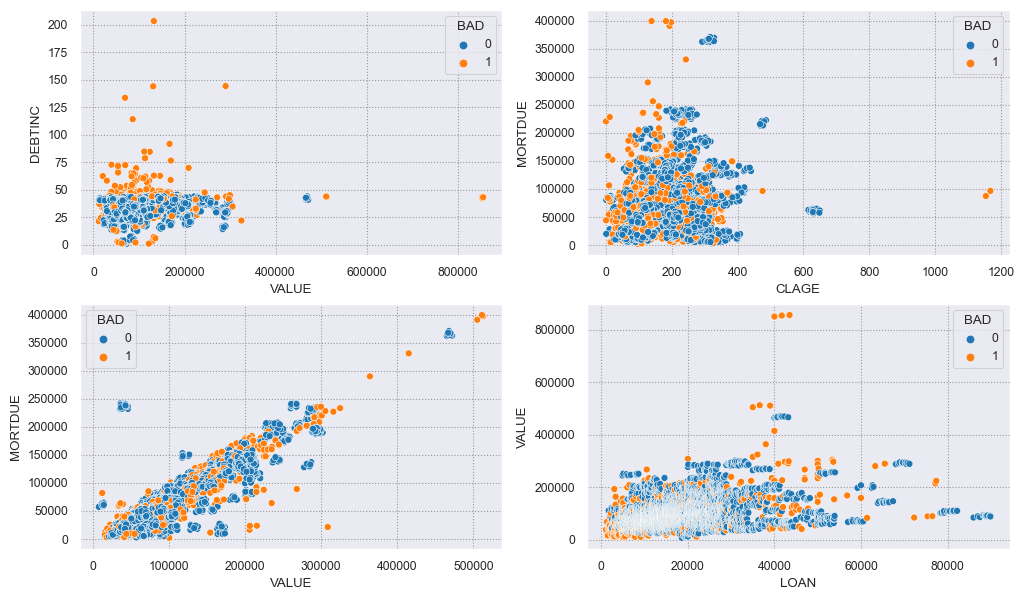

In [242]:
plt.figure(figsize = (12, 7))
x = df['VALUE']
y = df['DEBTINC']
hue=df['BAD']
plt.subplot(2, 2, 1)
gr.plotScatter(x,y,hue)

x = df['CLAGE']
y = df['MORTDUE']
plt.subplot(2, 2, 2)
gr.plotScatter(x,y,hue)

x = df['VALUE']
y = df['MORTDUE']
hue=df['BAD']
plt.subplot(2, 2, 3)
gr.plotScatter(x,y,hue)

x = df['LOAN']
y = df['VALUE']
plt.subplot(2, 2, 4)
gr.plotScatter(x,y,hue)


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3> 
        
 **Graph1**  
    * maximum loan defaults are under the region VALUE < 20000 and DEBTINC > 47.    
**Graph2**      
    * maximum loan defaults are under the region CLAGE < 200 and MORTDUE < near 250000.    
**Graph3**      
    * Seems laon defaults are uniformly distributed.   
**Graph4**     
    * maximum loan defaults are under the region LOAN < 20000 and VALUE < near 200000.   
           
 

## Treating Outliers

We have observed in **Univariate** analysis that there are quite a few outliers on each numnerical features. 
Let us treat those one by one.

**LOAN**

<Figure size 100x200 with 0 Axes>

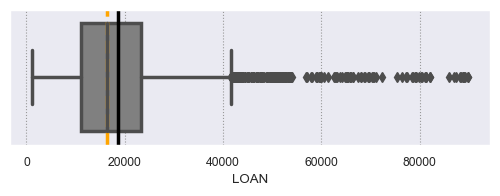

In [243]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['LOAN'],0,axes)
range_before=df.LOAN.max() - df.LOAN.min() 

Strategy: Dealing with the outliers through IQR score method.

In [244]:
Q1 = df['LOAN'].quantile(0.25)
Q3 = df['LOAN'].quantile(0.75)
IQR = Q3 - Q1
df['LOAN'] = df.LOAN[~((df.LOAN < (Q1 - 1.5 * IQR)) |(df.LOAN > (Q3 + 1.5 * IQR)))]

range_before, 88800
range_after, 40500


<Figure size 100x200 with 0 Axes>

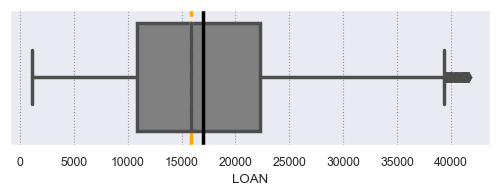

In [245]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6
                                        , 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['LOAN'],0,axes)
range_after=df.LOAN.max() - df.LOAN.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**MORTDUE**

<Figure size 100x200 with 0 Axes>

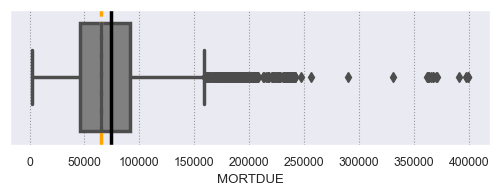

In [246]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['MORTDUE'],0,axes)
range_before=df.MORTDUE.max() - df.MORTDUE.min() 

Strategy: Dealing with the outliers through IQR score method.

In [247]:
Q1 = df['MORTDUE'].quantile(0.25)
Q3 = df['MORTDUE'].quantile(0.75)
IQR = Q3 - Q1
df['MORTDUE'] = df.MORTDUE[~((df.MORTDUE < (Q1 - 1.5 * IQR)) |(df.MORTDUE > (Q3 + 1.5 * IQR)))]

range_before, 397487
range_after, 156937


<Figure size 100x200 with 0 Axes>

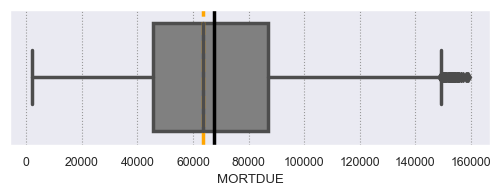

In [248]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['MORTDUE'],0,axes)
range_after=df.MORTDUE.max() - df.MORTDUE.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**VALUE**

<Figure size 100x200 with 0 Axes>

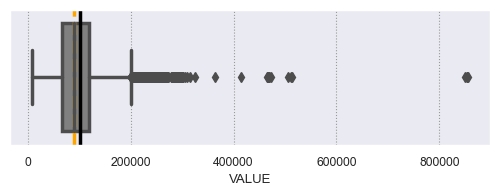

In [249]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['VALUE'],0,axes)
range_before=df.VALUE.max() - df.VALUE.min() 

Strategy: Dealing with the outliers through IQR score method.

In [250]:
Q1 = df['VALUE'].quantile(0.25)
Q3 = df['VALUE'].quantile(0.75)
IQR = Q3 - Q1
df['VALUE'] = df.VALUE[~((df.VALUE < (Q1 - 1.5 * IQR)) |(df.VALUE > (Q3 + 1.5 * IQR)))]

range_before, 847909
range_after, 192339


<Figure size 100x200 with 0 Axes>

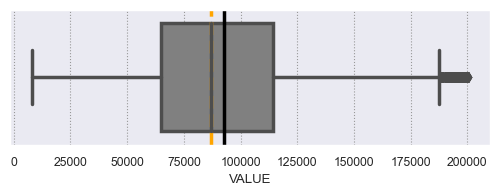

In [251]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['VALUE'],0,axes)
range_after=df.VALUE.max() - df.VALUE.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**YOJ**

<Figure size 100x200 with 0 Axes>

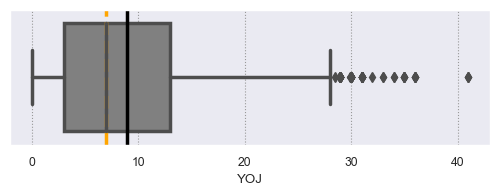

In [252]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['YOJ'],0,axes)
range_before=df.YOJ.max() - df.YOJ.min() 

Strategy: Dealing with the outliers through IQR score method.

In [253]:
Q1 = df['YOJ'].quantile(0.25)
Q3 = df['YOJ'].quantile(0.75)
IQR = Q3 - Q1
df['YOJ'] = df.YOJ[~((df.YOJ < (Q1 - 1.5 * IQR)) |(df.YOJ > (Q3 + 1.5 * IQR)))]

range_before, 41
range_after, 28


<Figure size 100x200 with 0 Axes>

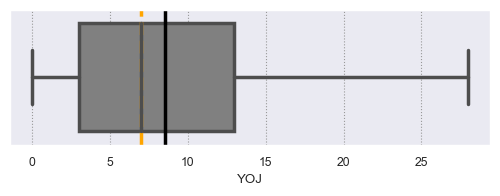

In [254]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['YOJ'],0,axes)
range_after=df.YOJ.max() - df.YOJ.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**DEROG**

<Figure size 100x200 with 0 Axes>

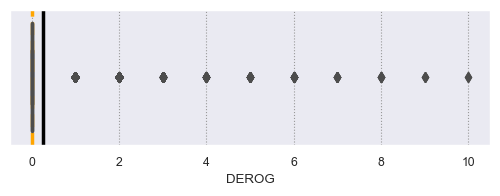

In [255]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['DEROG'],0,axes)
range_before=df.DEROG.max() - df.DEROG.min() 

The variable DEROG is not centered , let us leave it **as it is**.

**DELINQ**

<Figure size 100x200 with 0 Axes>

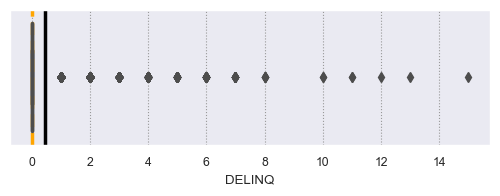

In [256]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['DELINQ'],0,axes)
range_before=df.DELINQ.max() - df.DELINQ.min() 

The variable DELINQ is not centered , let us leave it **as it is**.

**CLAGE**

<Figure size 100x200 with 0 Axes>

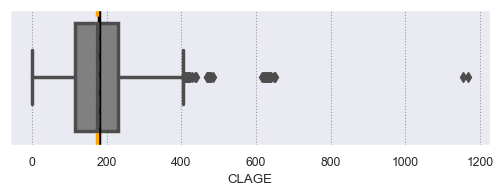

In [257]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['CLAGE'],0,axes)
range_before=df.CLAGE.max() - df.CLAGE.min() 

Strategy: Dealing with the outliers through IQR score method.

In [258]:
Q1 = df['CLAGE'].quantile(0.25)
Q3 = df['CLAGE'].quantile(0.75)
IQR = Q3 - Q1
df['CLAGE'] = df.CLAGE[~((df.CLAGE < (Q1 - 1.5 * IQR)) |(df.CLAGE > (Q3 + 1.5 * IQR)))]

range_before, 1168
range_after, 406


<Figure size 100x200 with 0 Axes>

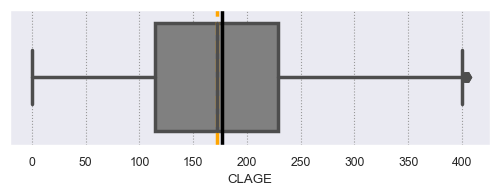

In [259]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['CLAGE'],0,axes)
range_after=df.CLAGE.max() - df.CLAGE.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**NINQ**

<Figure size 100x200 with 0 Axes>

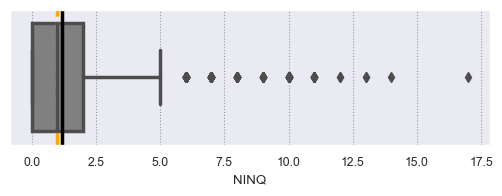

In [260]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['NINQ'],0,axes)
range_before=df.NINQ.max() - df.NINQ.min() 

Strategy: Dealing with the outliers through IQR score method.

In [261]:
Q1 = df['NINQ'].quantile(0.25)
Q3 = df['NINQ'].quantile(0.75)
IQR = Q3 - Q1

df['NINQ'] = df.NINQ[~((df.NINQ < (Q1 - 1.5 * IQR)) |(df.NINQ > (Q3 + 1.5 * IQR)))]

range_before, 17
range_after, 5


<Figure size 100x200 with 0 Axes>

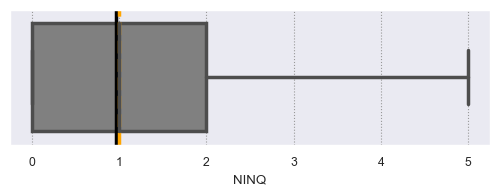

In [262]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['NINQ'],0,axes)
range_after=df.NINQ.max() - df.NINQ.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**CLNO**

<Figure size 100x200 with 0 Axes>

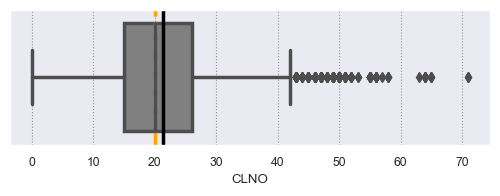

In [263]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['CLNO'],0,axes)
range_before=df.CLNO.max() - df.CLNO.min() 

Strategy: Dealing with the outliers through IQR score method.

In [264]:
Q1 = df['CLNO'].quantile(0.25)
Q3 = df['CLNO'].quantile(0.75)
IQR = Q3 - Q1
df['CLNO'] = df.CLNO[~((df.CLNO < (Q1 - 1.5 * IQR)) |(df.CLNO > (Q3 + 1.5 * IQR)))]

range_before, 71
range_after, 42


<Figure size 100x200 with 0 Axes>

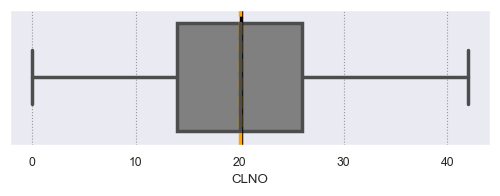

In [265]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['CLNO'],0,axes)
range_after=df.CLNO.max() - df.CLNO.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

**DEBTINC**

<Figure size 100x200 with 0 Axes>

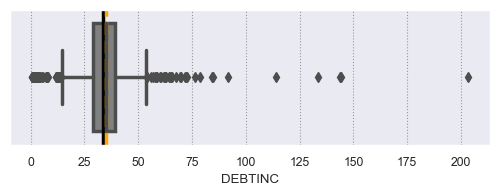

In [266]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['DEBTINC'],0,axes)
range_before=df.DEBTINC.max() - df.DEBTINC.min() 

Strategy: Dealing with the outliers through IQR score method.

In [267]:
Q1 = df['DEBTINC'].quantile(0.25)
Q3 = df['DEBTINC'].quantile(0.75)
IQR = Q3 - Q1
df['DEBTINC'] = df.DEBTINC[~((df.DEBTINC < (Q1 - 1.5 * IQR)) |(df.DEBTINC > (Q3 + 1.5 * IQR)))]

range_before, 203
range_after, 39


<Figure size 100x200 with 0 Axes>

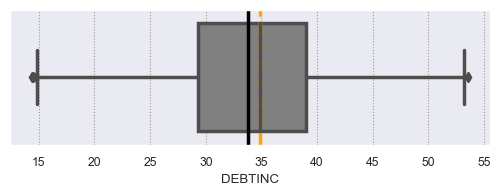

In [268]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(6, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotBox(df,['DEBTINC'],0,axes)
range_after=df.DEBTINC.max() - df.DEBTINC.min() 
print("range_before,",round(range_before))
print("range_after,",round(range_after))

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

- Except DEROG and DELINQ we solved outliers for all other features. You could see now the **_range_** after treatment reduced bringing the distribution within or closer to upper whisker. 
    

## Treating Missing Values

#### Eliminating missing values.

In [269]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'LOAN': number of missing values '256' ---> '4.295%'
'MORTDUE': number of missing values '752' ---> '12.617%'
'VALUE': number of missing values '432' ---> '7.248%'
'REASON': number of missing values '252' ---> '4.228%'
'JOB': number of missing values '279' ---> '4.681%'
'YOJ': number of missing values '606' ---> '10.168%'
'DEROG': number of missing values '708' ---> '11.879%'
'DELINQ': number of missing values '580' ---> '9.732%'
'CLAGE': number of missing values '355' ---> '5.956%'
'NINQ': number of missing values '687' ---> '11.527%'
'CLNO': number of missing values '441' ---> '7.399%'
'DEBTINC': number of missing values '1361' ---> '22.836%'


**LOAN**

<Figure size 100x200 with 0 Axes>

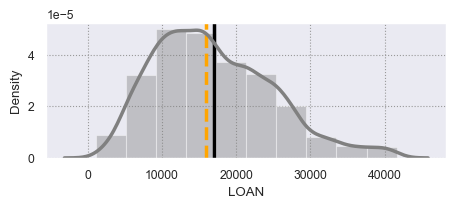

In [270]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'LOAN',axes)   

Strategy: Replacing missing values with the mean (average).

In [271]:
df["LOAN"] = df.LOAN.fillna(df.LOAN.mean())

**MORTDUE**

<Figure size 100x200 with 0 Axes>

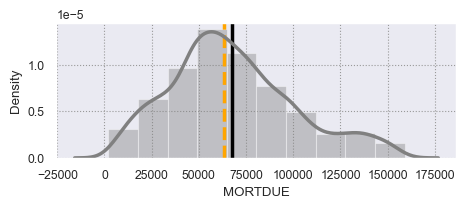

In [272]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'MORTDUE',axes)   


Strategy: Replacing missing values with the mean (average).

In [273]:
df["MORTDUE"] = df.MORTDUE.fillna(df.MORTDUE.mean())

**VALUE**

<Figure size 100x200 with 0 Axes>

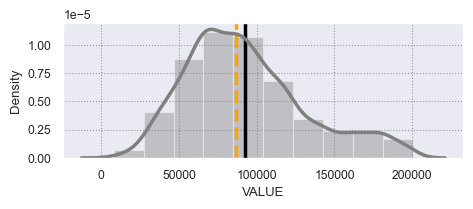

In [274]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'VALUE',axes)   

Strategy: Replacing missing values with the mean (average).

In [275]:
df["VALUE"] = df.VALUE.fillna(df.VALUE.mean())

**REASON**

In [276]:
df["REASON"].value_counts(dropna=False)

DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64

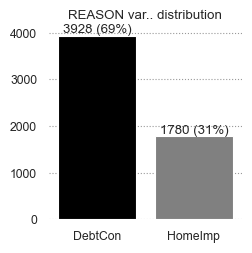

In [277]:
x='REASON'
plt.figure(figsize = (2.5, 2.5))
palette = ['black','grey']
order=df[x].value_counts().index 
title = 'REASON var.. distribution'
gr.plotCount(df,x,order,"",palette,title)

Strategy: Mode imputation (replacing NaN by most frequent value: DebtCon).

In [278]:
df["REASON"] = df.REASON.fillna(df.REASON.value_counts().index[0])

**JOB**

In [279]:
df["JOB"].value_counts(dropna=False)

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64

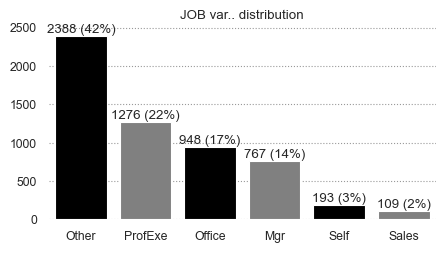

In [280]:
x='JOB'
plt.figure(figsize = (5, 2.5))
palette = ['black','grey']
order=df[x].value_counts().index 
title = 'JOB var.. distribution'
gr.plotCount(df,x,order,"",palette,title)

Strategy: Mode imputation (replacing NaN by most frequent value: Other).

In [281]:
df["JOB"] = df.JOB.fillna(df.JOB.value_counts().index[0])

**YOJ**

<Figure size 100x200 with 0 Axes>

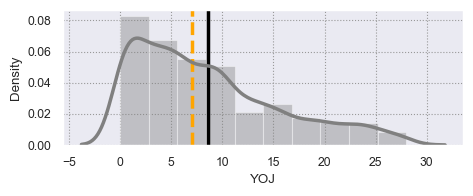

In [282]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'YOJ',axes) 

Strategy: Replacing missing values with the mean (average).

In [283]:
df["YOJ"] = df.YOJ.fillna(df.YOJ.mean())

**DEROG**

<Figure size 100x200 with 0 Axes>

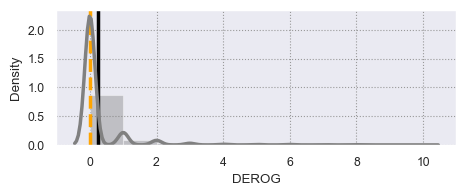

In [284]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'DEROG',axes) 

Strategy: Replacing missing values with the mean (average).

In [285]:
df["DEROG"] = df.DEROG.fillna(df.DEROG.mean())

**DELINQ**

<Figure size 100x200 with 0 Axes>

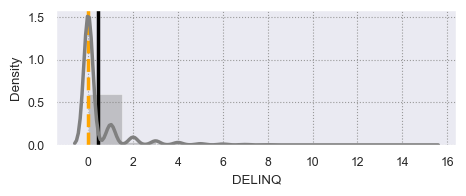

In [286]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'DELINQ',axes) 

Strategy: Replacing missing values with the mean (average).

In [287]:
df["DELINQ"] = df.DELINQ.fillna(df.DELINQ.mean())

**CLAGE**

<Figure size 100x200 with 0 Axes>

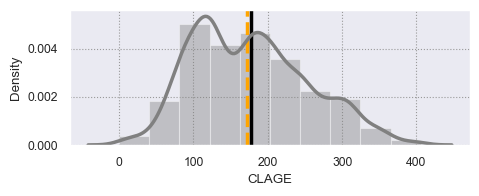

In [288]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'CLAGE',axes) 

Strategy: Replacing missing values with the mean (average).

In [289]:
df["CLAGE"] = df.CLAGE.fillna(df.CLAGE.mean())

**NINQ**

<Figure size 100x200 with 0 Axes>

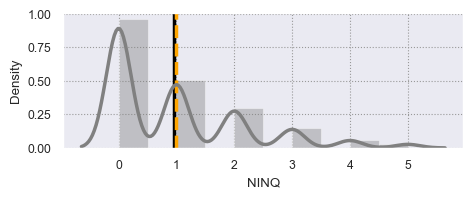

In [290]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'NINQ',axes)

Strategy: Replacing missing values with the mean (average).

In [291]:
df["NINQ"] = df.NINQ.fillna(df.NINQ.mean())

**CLNO**

<Figure size 100x200 with 0 Axes>

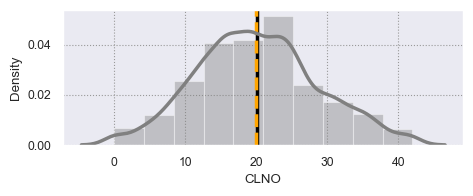

In [292]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'CLNO',axes)

Strategy: Replacing missing values with the mean (average).

In [293]:
df["CLNO"] = df.CLNO.fillna(df.CLNO.mean())

**DEBTINC**

<Figure size 100x200 with 0 Axes>

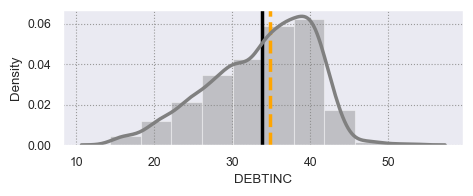

In [294]:
plt.figure(figsize = (1, 2))
fig, axes = plt.subplots(1, 1, figsize=(5, 1.5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
gr.plotDist(df,'DEBTINC',axes)

Strategy: Replacing missing values with the mean (average).

In [295]:
df["DEBTINC"] = df.DEBTINC.fillna(df.DEBTINC.mean())

In [296]:
for column in df.columns:
    if df[column].isna().sum() == 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'BAD': number of missing values '0' ---> '0.000%'
'LOAN': number of missing values '0' ---> '0.000%'
'MORTDUE': number of missing values '0' ---> '0.000%'
'VALUE': number of missing values '0' ---> '0.000%'
'REASON': number of missing values '0' ---> '0.000%'
'JOB': number of missing values '0' ---> '0.000%'
'YOJ': number of missing values '0' ---> '0.000%'
'DEROG': number of missing values '0' ---> '0.000%'
'DELINQ': number of missing values '0' ---> '0.000%'
'CLAGE': number of missing values '0' ---> '0.000%'
'NINQ': number of missing values '0' ---> '0.000%'
'CLNO': number of missing values '0' ---> '0.000%'
'DEBTINC': number of missing values '0' ---> '0.000%'


<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   

- You could see now **_no missing_** values after treatment.

## Feature Selection

select **_numerical_** columns.

In [297]:
df_nu = df.select_dtypes(exclude=["object","category"]).copy()

In [298]:
Xnum = df_nu.drop(["BAD"], axis= "columns")

In [299]:
Ynum = df_nu.BAD

Identifying the predictive features using the Pearson Correlation **p-value**.

In [300]:
import scipy.stats
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    Ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
LOAN,-0.1088,0.0000
MORTDUE,-0.0806,0.0000
VALUE,-0.0831,0.0000
YOJ,-0.0584,0.0000
DEROG,0.2641,0.0000
DELINQ,0.3415,0.0000
CLAGE,-0.1761,0.0000
NINQ,0.1369,0.0000
CLNO,-0.0302,0.0197
DEBTINC,0.0815,0.0000


Strategy: Drop features with p-value > 0.05  → low information to the target, and keep all the others.

There are no features satisfying above condition, therefore we **keep** all numeric features.

**Categorical/binary** features selection test on binary target feature(BAD).

In [301]:
Xcat = df.select_dtypes(exclude=['int64','float64']).copy()
Xcat['target'] = df.BAD

In [302]:
Xcat.dropna(how="any", inplace=True)
Ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

**_Chi-square_** test for independence.

In [303]:
for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], Ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
REASON,,
DebtCon,3387,793
HomeImp,1384,396


p-value: 0.0042234365360506280484554



target,0,1
JOB,,
Mgr,588,179
Office,823,125
Other,2090,577
ProfExe,1064,212
Sales,71,38
Self,135,58


p-value: 0.0000000000000164369381657


Strategy: Keep all features (p-value < 0.05). 

Both categorical variables JOB and REASON  have predictive power on target variable. We will select both of them.

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>   
   
- There is **_80-20_** split in favour of class 0.
- 4771 customers have **_repaid_** the loan ( class 0) and
- 1189 customers have **_defaulted_** on the loan.
- Customers with _"Office"_ job have **_lowest_** default rate. 
- "Sales" and "Self employed" customers have very high default rate. 
- Loans on **_home improvement_** has higher defualt rate compared to loans on debt consolidation.
- In chi-square and pearson p-value test we did not find any **_insignificant_** valiables. 
  those retained all of them
- Successfully **_treated_** outliers. 
- Successfully **_treated_** missing values. 

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [304]:
# Separating the target variable and other variables
X = df.drop(columns = 'BAD')
Y = df['BAD']

In [305]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = False)

In [306]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   float64
 1   MORTDUE         5960 non-null   float64
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_DebtCon  5960 non-null   uint8  
 11  REASON_HomeImp  5960 non-null   uint8  
 12  JOB_Mgr         5960 non-null   uint8  
 13  JOB_Office      5960 non-null   uint8  
 14  JOB_Other       5960 non-null   uint8  
 15  JOB_ProfExe     5960 non-null   uint8  
 16  JOB_Sales       5960 non-null   uint8  
 17  JOB_Self        5960 non-null   u

In [307]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [308]:
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.25, random_state = 65, stratify=Y)

In [309]:
# Function to print classification report and get confusion matrix in a proper format
def metrics_score(metrics_df, model_id, train_or_test, actual, predicted,time):
    precision,recall,fscore,support = score(actual,predicted,average='macro')
    td = datetime.now().timestamp() - time
    metrics_dict = {'model_id': model_id,
                    'Data': train_or_test,
                    'f1-score': fscore,
                    'precision' :precision,
                    'recall' :recall,
                    'timelapsed': td 
                }
    metrics_df = metrics_df.append(metrics_dict,ignore_index=True)
    print('                          ')
    print('                          MODEL SCORES')
    print('                          ')
    print(metrics_df.iloc[::-1])
    print('                                ')
    print('                                 CONFUSION MATRIX')
    cm = confusion_matrix(actual, predicted)
    gr.plotHeatmap(cm,'small')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    return metrics_df

In [310]:
# let us define a function to draw AUC_ROC plot. 
def auc_roc_plot(test, preds):
    fpr, tpr, thresholds = roc_curve(test,preds)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Logistic Regression

In [311]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, date, time, timezone
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve

In [312]:
before = datetime.now()
model1_lr = LogisticRegression(penalty="l2", solver= "liblinear", max_iter = 1500)

In [313]:
from sklearn.metrics import precision_recall_fscore_support as score
# initialzing a df to capture metrics scores.
metrics_dict = {}
metrics_df = pd.DataFrame.from_dict(metrics_dict)

In [314]:
# Fitting the logistic regression model
model1_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1500, solver='liblinear')

                          
                          MODEL SCORES
                          
           model_id   Data  f1-score  precision    recall  timelapsed
0  1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


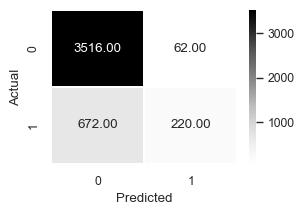

0.8098416956247841


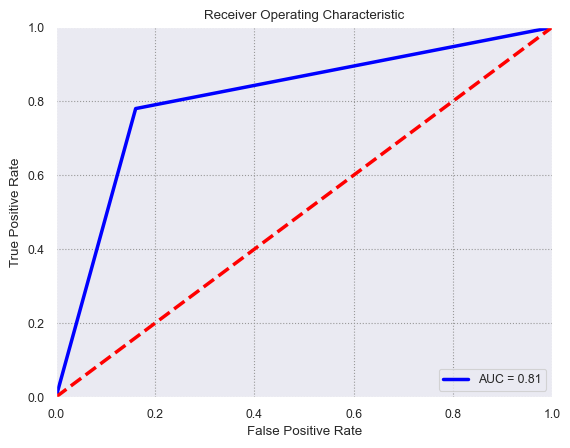

In [315]:
# Checking the performance on the training data
Y_pred_train = model1_lr.predict(X_train)
metrics_df = metrics_score(metrics_df,'1:LogisticR Orig','Train', Y_train, Y_pred_train, before.timestamp())
auc_roc_plot(Y_pred_train, Y_train)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* This model is giving f1-score of .64, which not that good. We may try tuning with hyperparameter.   
* there are many false positives or false negatives.  
    
Reading confusion matrix (clockwise rom bottom right square):
 
  0 : Negative class ( repaid).  
  1 : Positive class ( defaulted)
    
**True Positive:** _Predicting customer will default and the customer actually defaulted._  
**False Negative:** _Predicting customer will not default and the customer actually defaulted._    
**True Negative:** _Predicting customer will not default and the customer actually did not default._   
**False Positive:** _Predicting customer will default and the cusomer actually did not default._ 

                          
                          MODEL SCORES
                          
           model_id   Data  f1-score  precision    recall  timelapsed
1  1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0  1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


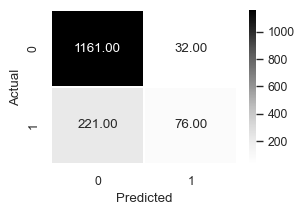

0.7718952671919386


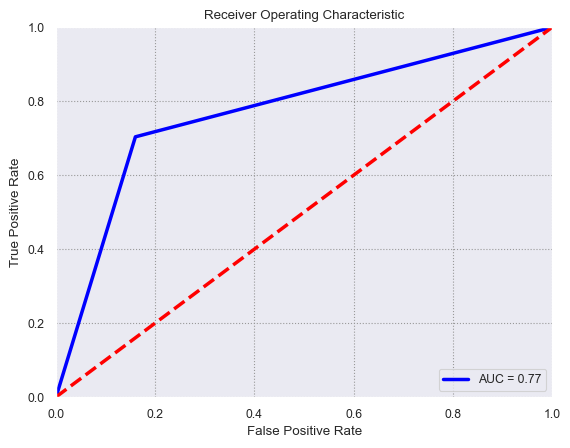

In [316]:
# Checking the performance on the test data
Y_pred_test = model1_lr.predict(X_test)
metrics_df = metrics_score(metrics_df,'1:LogisticR Orig','Test', Y_test, Y_pred_test,before.timestamp())
auc_roc_plot(Y_pred_test, Y_test)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* This model is also giving f1-score of .64 on test data. This score is too low to be reliable in predicting.   
* there are many false positives or false negatives.  
    

### Logistic regression Hypertuning

In [317]:
before = datetime.now()
model2_lr_tuned = LogisticRegression(penalty="l2", solver= "liblinear", class_weight = 'balanced', max_iter = 2500)

In [318]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [319]:
grdsrch_lr = GridSearchCV(model2_lr_tuned, parameters, cv = 5)
grdsrch_lr = grdsrch_lr.fit(X_train, Y_train)

In [320]:
# Set the classifier to the best combination of parameters
model2_lr_tuned = grdsrch_lr.best_estimator_
# Fit the best algorithm to the data
model2_lr_tuned.fit(X_train, Y_train)

LogisticRegression(C=100, class_weight='balanced', max_iter=2500,
                   solver='liblinear')

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


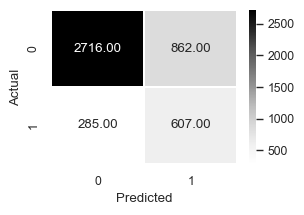

0.6591189594392066


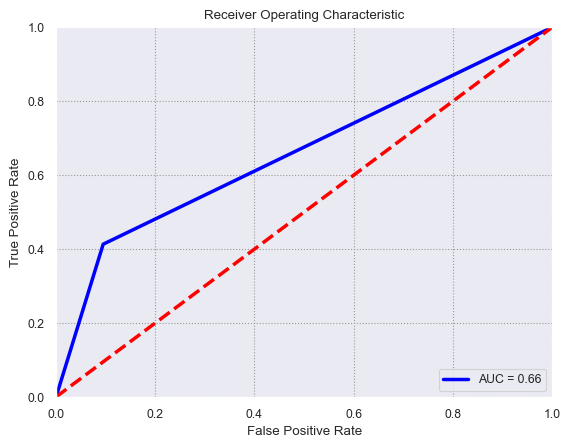

In [321]:
# Checking the performance on the training data
Y_pred_train_tuned = model2_lr_tuned.predict(X_train)
metrics_df = metrics_score(metrics_df,'2:LogisticR Tuned','Train', Y_train, Y_pred_train_tuned, before.timestamp())
auc_roc_plot(Y_pred_train_tuned, Y_train)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* f1-score is improved to  .66.
    

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


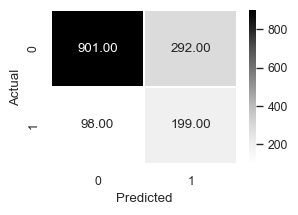

0.6535986087920914


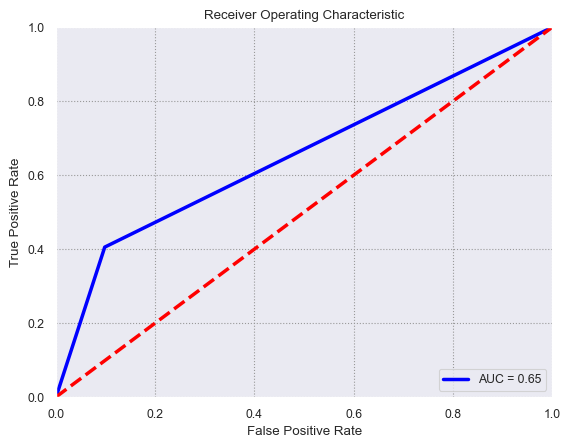

In [322]:
# Checking the performance on the test data
Y_pred_test_tuned = model2_lr_tuned.predict(X_test)
metrics_df = metrics_score(metrics_df,'2:LogisticR tuned','Test', Y_test, Y_pred_test_tuned, before.timestamp())
auc_roc_plot(Y_pred_test_tuned, Y_test)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* f1-score is improved to  .66 on test data.
    

### Decision Tree

In [323]:
# Fitting the decision tree classifier on the training data
before = datetime.now()
model3_d_tree =  DecisionTreeClassifier(random_state = 1)
model3_d_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
4       3:DTree Orig  Train  1.000000   1.000000  1.000000    0.078837
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


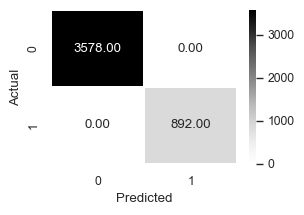

1.0


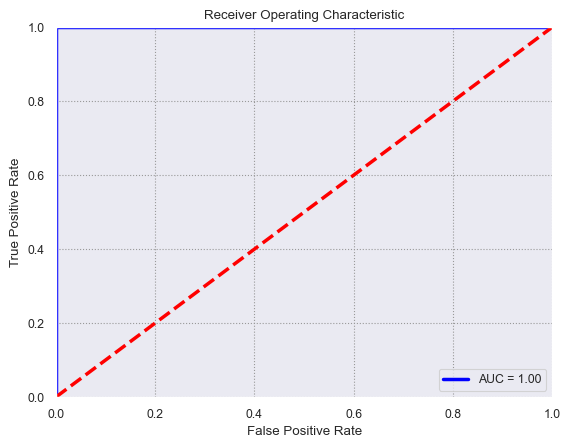

In [324]:
# Checking performance on the training data.
# Note: Top row from the 'MODEL SCORES' is from this run. 
Y_pred_train3 = model3_d_tree.predict(X_train)
metrics_df = metrics_score(metrics_df,'3:DTree Orig','Train', Y_train, Y_pred_train3,before.timestamp())
auc_roc_plot(Y_pred_train3, Y_train)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* This model is performiang to the perfection. Most likely overfitting on the training dataset.  
* there are no false positives or false negatives. 
    


                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
5       3:DTree Orig   Test  0.787739   0.795374  0.780881    0.699065
4       3:DTree Orig  Train  1.000000   1.000000  1.000000    0.078837
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


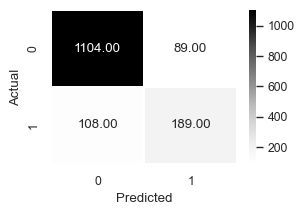

0.7953736021084123


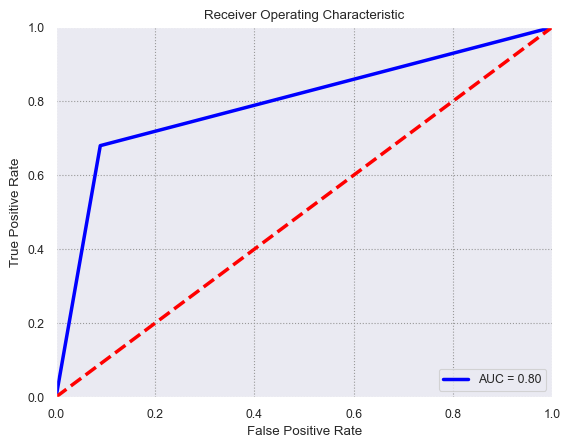

In [325]:
# Checking performance on the testing data
# Note: Top row from the 'MODEL SCORES' is from this run. 
Y_pred_test3 = model3_d_tree.predict(X_test)
metrics_df = metrics_score(metrics_df, '3:DTree Orig','Test',Y_test, Y_pred_test3, before.timestamp())
auc_roc_plot(Y_pred_test3, Y_test)

<div style="background-image: linear-gradient(white,rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>

* You can see f1-score is much lower than the score from training dataset. This model is **_overfitting_** and  
    we shall ignore this model for consideration. 
* there are quite a lot false positives and and false negatives. 

In [326]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [327]:
# Choose the type of classifier 
model4_d_tree_tuned = DecisionTreeClassifier(random_state = 65, class_weight = {0: 0.30, 1: 0.70})
before = datetime.now()
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10, 15), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2,3,4,5]
             }
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(model4_d_tree_tuned, parameters, scoring = scorer, cv = 6)
grid_obj = grid_obj.fit(X_train, Y_train)
# Set the classifier to the best combination of parameters
model4_d_tree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data
model4_d_tree_tuned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=10, min_samples_leaf=4, random_state=65)

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
6      4:DTree tuned  Train  0.877633   0.857517  0.904113   11.109076
5       3:DTree Orig   Test  0.787739   0.795374  0.780881    0.699065
4       3:DTree Orig  Train  1.000000   1.000000  1.000000    0.078837
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


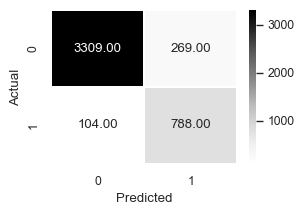

0.8575172118625957


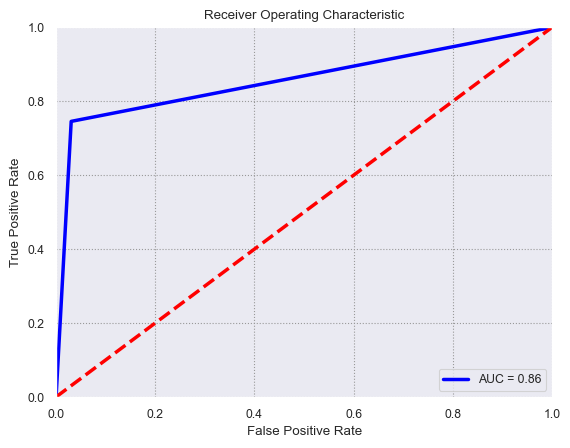

In [328]:
# Checking performance on the training data
# Note: Top row from the 'MODEL SCORES' is from this run.
Y_pred_train4 = model4_d_tree_tuned.predict(X_train)
metrics_df = metrics_score(metrics_df, '4:DTree tuned','Train',Y_train, Y_pred_train4, before.timestamp())
auc_roc_plot(Y_pred_train4, Y_train)

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* Tuning definiely working here. F1-score improved to 0.88. So as precission and recall. 
  let us check now on the test data.
    
* there are still few false positives and false negatives.

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
7      4:DTree Tuned   Test  0.805656   0.793018  0.821334   11.547906
6      4:DTree tuned  Train  0.877633   0.857517  0.904113   11.109076
5       3:DTree Orig   Test  0.787739   0.795374  0.780881    0.699065
4       3:DTree Orig  Train  1.000000   1.000000  1.000000    0.078837
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


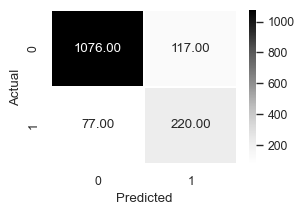

0.7930183420363855


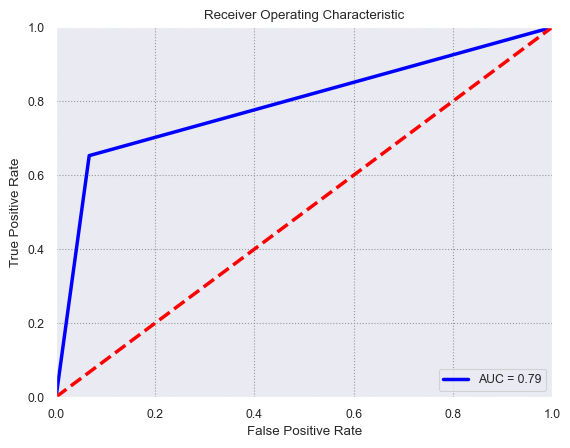

In [329]:
# Checking performance on the test data
# Note: Top row from the 'MODEL SCORES' is from this run.
Y_pred_test4 = model4_d_tree_tuned.predict(X_test)
metrics_df = metrics_score(metrics_df, '4:DTree Tuned','Test',Y_test, Y_pred_test4, before.timestamp())
auc_roc_plot(Y_pred_test4, Y_test)

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
* f1-score also improved and balanced with _test_ data. This model is a good candidate for our final model.   
* there are few false positives and false negatives. 

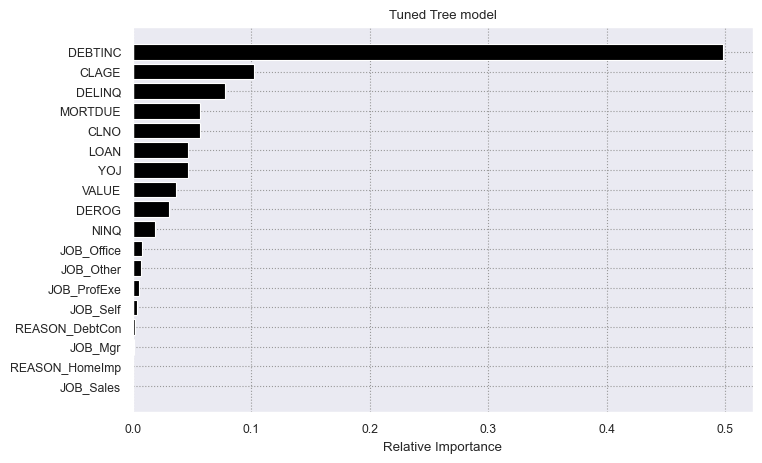

In [330]:
# Plotting the feature importance
importances_tree = model4_d_tree_tuned.feature_importances_
indices_t = np.argsort(importances_tree)
features = list(X.columns)
plt.figure(figsize = (8, 5))
plt.title('Tuned Tree model')
plt.barh(range(len(indices_t)), importances_tree[indices_t], color = 'k', align = 'center')
plt.yticks(range(len(indices_t)), [features[i] for i in indices_t])
plt.xlabel('Relative Importance')
plt.show()

 <div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
 
**Top 4 important features.**   
>DEBTINC    
>CLAGE   
>DELINQ  
>MORTDUE
    
**Least important features**
> JOB_Sales   
> REASON_HomeImp   
> JOB_Mgr  
> REASON_DebtCon 

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [331]:
# Fitting the random forest tree classifier on the training data
before = datetime.now()
model5_rf_estimator = RandomForestClassifier(random_state = 65, criterion = "entropy")
model5_rf_estimator.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=65)

In [332]:
Y_pred_train5 = model5_rf_estimator.predict(X_train)

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
8     5:RandomF Orig  Train  1.000000   1.000000  1.000000    1.161915
7      4:DTree Tuned   Test  0.805656   0.793018  0.821334   11.547906
6      4:DTree tuned  Train  0.877633   0.857517  0.904113   11.109076
5       3:DTree Orig   Test  0.787739   0.795374  0.780881    0.699065
4       3:DTree Orig  Train  1.000000   1.000000  1.000000    0.078837
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


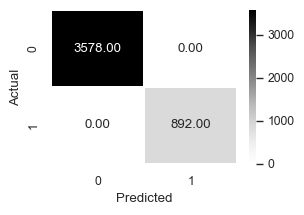

1.0


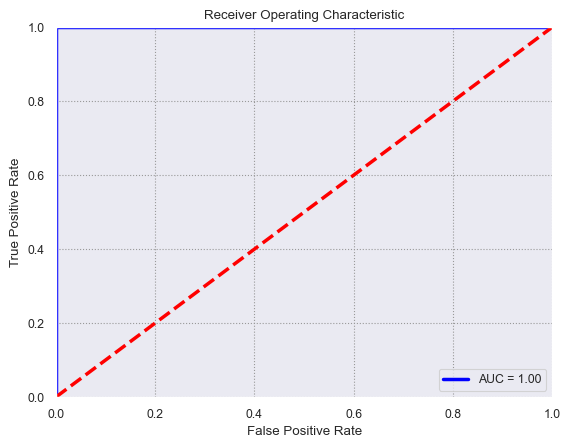

In [333]:
# Checking performance on the training data
# Note: Top row from 'MODEL SCORES' is from this run. 
metrics_df = metrics_score(metrics_df, '5:RandomF Orig','Train',Y_train, Y_pred_train5, before.timestamp())
auc_roc_plot(Y_pred_train5, Y_train)

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- **This  random forest model** is giving a **perfect** performance on the training data   
This model is most likely overfitting to the training dataset.

                          
                          MODEL SCORES
                          
            model_id   Data  f1-score  precision    recall  timelapsed
9     5:RandomF Orig   Test  0.851847   0.901615  0.819069    1.649158
8     5:RandomF Orig  Train  1.000000   1.000000  1.000000    1.161915
7      4:DTree Tuned   Test  0.805656   0.793018  0.821334   11.547906
6      4:DTree tuned  Train  0.877633   0.857517  0.904113   11.109076
5       3:DTree Orig   Test  0.787739   0.795374  0.780881    0.699065
4       3:DTree Orig  Train  1.000000   1.000000  1.000000    0.078837
3  2:LogisticR tuned   Test  0.663578   0.653599  0.712636    0.976619
2  2:LogisticR Tuned  Train  0.669923   0.659119  0.719788    0.421475
1   1:LogisticR Orig   Test  0.638528   0.771895  0.614535    0.623972
0   1:LogisticR Orig  Train  0.640136   0.809842  0.614654    0.062501
                                
                                 CONFUSION MATRIX


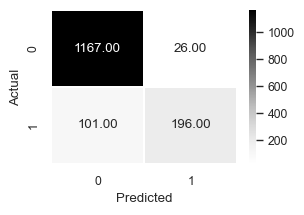

0.9016149430187285


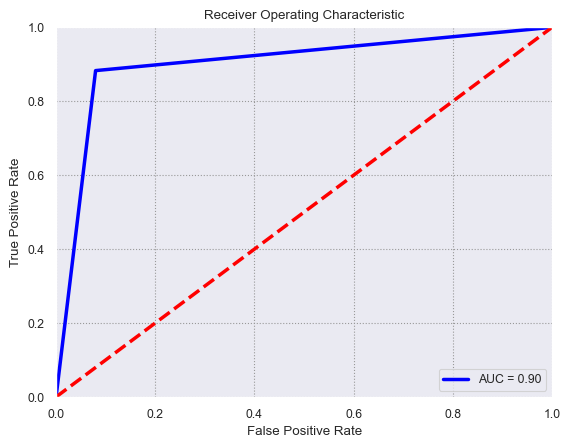

In [334]:
# Checking performance on the testing data
Y_pred_test5 = model5_rf_estimator.predict(X_test)
metrics_df = metrics_score(metrics_df, '5:RandomF Orig','Test',Y_test, Y_pred_test5,before.timestamp())
auc_roc_plot(Y_pred_test5, Y_test)

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- You can see f1-score is much lower on test data compared to train data. clearly model is overfitting on train data.
 We should ignore this model.  
- There are some false positives and false negatives. 

### **Random Forest Classifier Hyperparameter Tuning**

In [335]:
# Choose the type of classifier
model6_rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 65)
before = datetime.now()
# Grid of parameters to choose from
parameters = {"n_estimators": [270,275,280,290],
    "max_depth": [3, 5, 6, 7, 10],
    "max_features": [0.5, 0.8,0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(model6_rf_estimator_tuned, parameters, scoring = scorer, cv = 4)
grid_obj = grid_obj.fit(X_train, Y_train)
# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [336]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=1, n_estimators=270,
                       random_state=65)

                          
                          MODEL SCORES
                          
             model_id   Data  f1-score  precision    recall   timelapsed
10    6:RandomF Tuned  Train  0.948906   0.951809  0.946074  1657.000362
9      5:RandomF Orig   Test  0.851847   0.901615  0.819069     1.649158
8      5:RandomF Orig  Train  1.000000   1.000000  1.000000     1.161915
7       4:DTree Tuned   Test  0.805656   0.793018  0.821334    11.547906
6       4:DTree tuned  Train  0.877633   0.857517  0.904113    11.109076
5        3:DTree Orig   Test  0.787739   0.795374  0.780881     0.699065
4        3:DTree Orig  Train  1.000000   1.000000  1.000000     0.078837
3   2:LogisticR tuned   Test  0.663578   0.653599  0.712636     0.976619
2   2:LogisticR Tuned  Train  0.669923   0.659119  0.719788     0.421475
1    1:LogisticR Orig   Test  0.638528   0.771895  0.614535     0.623972
0    1:LogisticR Orig  Train  0.640136   0.809842  0.614654     0.062501
                               

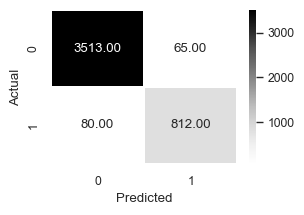

0.9518090890655561


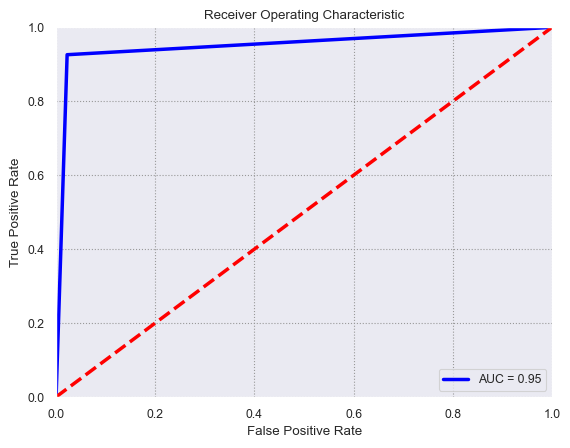

In [337]:
# Checking performance on the training data
# Note: Top row from the 'MODEL SCORES' is from this run.
Y_pred_train6 = rf_estimator_tuned_base.predict(X_train)
metrics_df = metrics_score(metrics_df, '6:RandomF Tuned','Train',Y_train, Y_pred_train6, before.timestamp())
auc_roc_plot(Y_pred_train6, Y_train)

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
- f1-score is much higher than the f1-score from Model_Tree_tuned( train ).  
- There are fewer false positives and false negatives. 

                          
                          MODEL SCORES
                          
             model_id   Data  f1-score  precision    recall   timelapsed
11    6:RandomF Tuned   Test  0.859922   0.883639  0.840983  1657.522707
10    6:RandomF Tuned  Train  0.948906   0.951809  0.946074  1657.000362
9      5:RandomF Orig   Test  0.851847   0.901615  0.819069     1.649158
8      5:RandomF Orig  Train  1.000000   1.000000  1.000000     1.161915
7       4:DTree Tuned   Test  0.805656   0.793018  0.821334    11.547906
6       4:DTree tuned  Train  0.877633   0.857517  0.904113    11.109076
5        3:DTree Orig   Test  0.787739   0.795374  0.780881     0.699065
4        3:DTree Orig  Train  1.000000   1.000000  1.000000     0.078837
3   2:LogisticR tuned   Test  0.663578   0.653599  0.712636     0.976619
2   2:LogisticR Tuned  Train  0.669923   0.659119  0.719788     0.421475
1    1:LogisticR Orig   Test  0.638528   0.771895  0.614535     0.623972
0    1:LogisticR Orig  Train  0

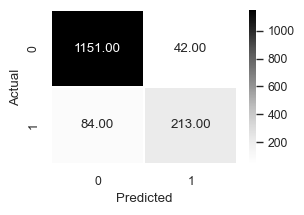

0.8836389616575375


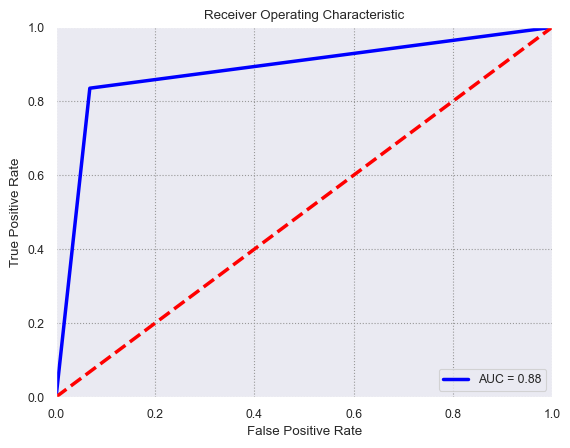

In [338]:
# Checking performance on the test data
Y_pred_test6 = rf_estimator_tuned_base.predict(X_test)
metrics_df = metrics_score(metrics_df, '6:RandomF Tuned','Test',Y_test, Y_pred_test6, before.timestamp())
auc_roc_plot(Y_pred_test6, Y_test)

<div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - f1-score is much higher than the f1-score from tuned tree model.    
 
 This model seems to be the right choice for our final model. 

### Let us check feature importance of the above tuned RF model.

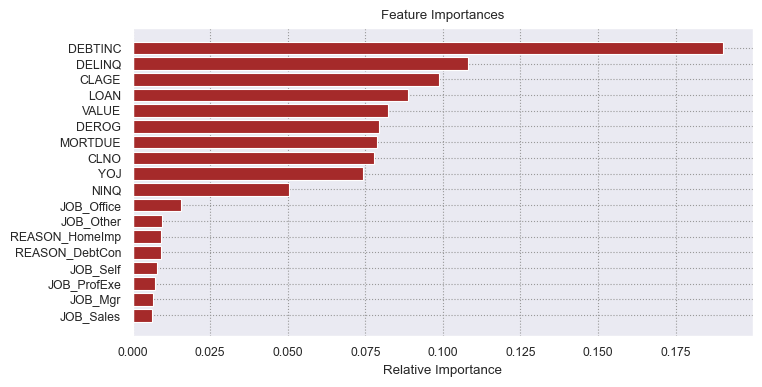

In [339]:
importances = rf_estimator_tuned_base.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize = (8, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'brown', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 <div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
 
**Top 4 important features.**   
>DEBTINC    
>CLAGE   
>DELINQ  
>LOAN
    
**Least important features**  
> JOB_Self   
> JOB_ProfExe   
> JOB_Mgr   
> JOB_Sales    

### Let us compare TREE and RF's feature importances.

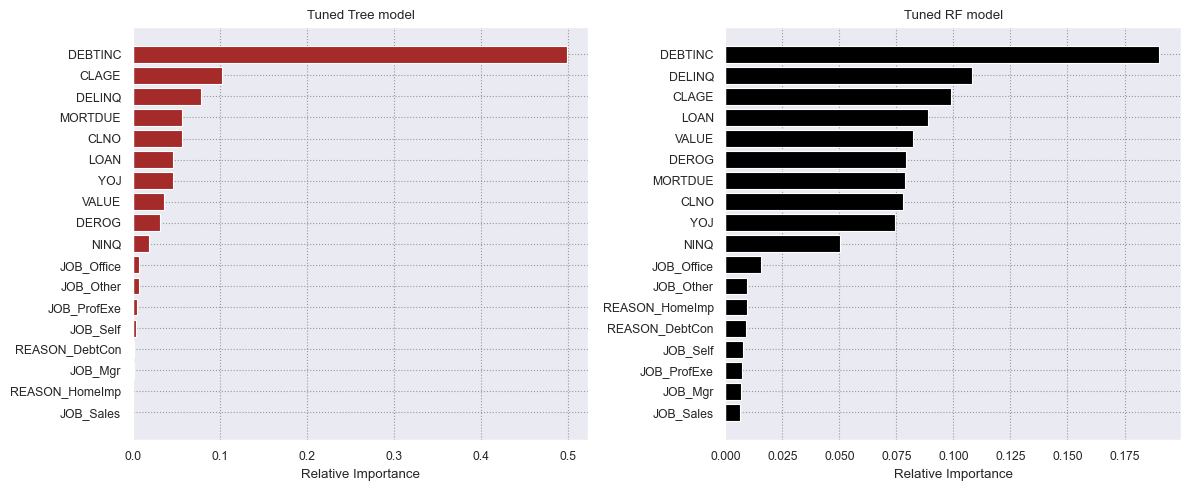

In [340]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(left=0.1, bottom=0.0, right=0.9, top=1.0, wspace=0.1, hspace=1.2)
plt.title('Tuned Tree model')
plt.barh(range(len(indices_t)), importances_tree[indices_t], color = 'brown', align = 'center')
plt.yticks(range(len(indices_t)), [features[i] for i in indices_t])
plt.xlabel('Relative Importance')
plt.subplot(1, 2, 1)

 
plt.subplot(1, 2, 2)
plt.title('Tuned RF model')
plt.barh(range(len(indices)), importances[indices], color = 'black', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.tight_layout()
plt.show()

<div style="background-image: linear-gradient(rgb(100,189,255), white);font-family: 'Segoe UI';font-size:'25'">
<t>
<h3> Observations</h3>
    
 - RF model found **_more_** features of importance than the tree model. 
 - **_Top_** THREE features of importances are same on these models. 
    - With CLAGE and DELINQ swaping 2nd and 3rd positions. 
 - **DTree** model did not give any importances to JOB_Sales, Reason_HomeImp, JOB_Mgr and REASON_DebtCon.   
    Where as RF models given some importance to them.   
 - feature importance of CLNO and MORTDUE is **_higer_** in DTree model compared to RF.
 - feature importance of LOAN and VALUE is **_higer_** in RF model compared to DTree.


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [341]:
metrics_df.iloc[::-1]

,model_id,Data,f1-score,precision,recall,timelapsed
11,6:RandomF Tuned,Test,0.859922,0.883639,0.840983,1657.522707
10,6:RandomF Tuned,Train,0.948906,0.951809,0.946074,1657.000362
9,5:RandomF Orig,Test,0.851847,0.901615,0.819069,1.649158
8,5:RandomF Orig,Train,1.000000,1.000000,1.000000,1.161915
7,4:DTree Tuned,Test,0.805656,0.793018,0.821334,11.547906
6,4:DTree tuned,Train,0.877633,0.857517,0.904113,11.109076
5,3:DTree Orig,Test,0.787739,0.795374,0.780881,0.699065
4,3:DTree Orig,Train,1.000000,1.000000,1.000000,0.078837
3,2:LogisticR tuned,Test,0.663578,0.653599,0.712636,0.976619
2,2:LogisticR Tuned,Train,0.669923,0.659119,0.719788,0.421475


 <div style="background-image: linear-gradient(white, rgb(100,189,255));font-family: 'Segoe UI';font-size:'25'">
<t>

 

* We have built THREE base models and THREE tuned models. 
* Tuned models with GridSearchCV algorithm.

Above metrics where I captured their performances on various parameters. 

**Logical Regression(LR) models:**  
> - Both "orig" and "tuned" models given **_lowest_** f1-score,prcission, recall and roc_auc scores.    
> - Overall, LR models are the **_fastest_**.  

**Tree models:**  
> - Both "orig" and "tuned" models given **_very good_** f1-score,prcission, recall and roc_auc scores.   
  but less than "Random forest(RF)".   
> - Overall, Tree models took **_longer_** time compared to LR models. but much lower than RF models.   

 **Random Forest(RF) models:**  
> - Both "orig" and "tuned" models given **_BEST_** f1-score,prcission, recall and roc_auc scores.    
> - RF models took **_much longer_** time compared to LR and Tree models.   



**2. Refined insights:** 


<div style="background-image: linear-gradient(white, rgb(10,289,55), rgb(300,289,155));font-family: 'Segoe UI';font-size:'25'">

    
**EDA**   
We performed EDA using univariate and multivalriate analysis and obtained very usefull insights from the features. 
* We applied **_treatment_** on features with **_outliers_**. 
* Professional executives (ProfExe) and people with Office jobs have low default rate. 
* Customers with **_"Office"_** job have **_lowest_** default rate. 
* **_"Sales"_** and **_"Self employed"_** customers have very high default rate. 
* Loans on **"_home improvement_"** has **_higher_** defualt rate compared to loans on debt consolidation.
    
**Model Building**  
We have built **SIX** models, out of those **three** are fine tuned.   
 
* Logistic regression has given a very **_low_** f1-score.
* decision  tree and random forest base (not tuned) models were **_overfitting_** on the training data.
* After applying **_tuning_** to these models their perfomance have improved and given a balanced scores on both    
  train and test datasets giving more **generalized** results. 
* RF model found **more** features of importance than the tree model. 
* **Top** THREE features of importances are same on tuned Tree and RF models. 
* All models performances are **captured** and **evaluated.**  
* **6:RandomF tuned** is the best model based on performance.  
    


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?


#### Model Selection

0.9518090890655561


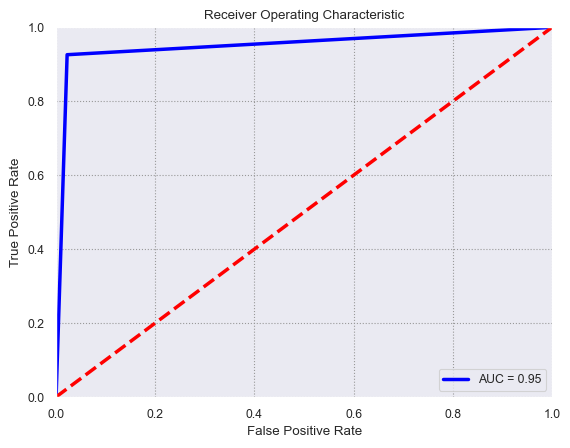

In [342]:
auc_roc_plot(Y_pred_train6, Y_train)

0.8836389616575375


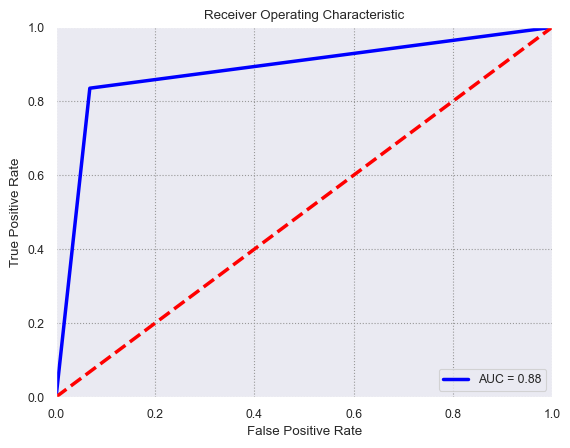

In [343]:
auc_roc_plot(Y_pred_test6, Y_test)

In [344]:
metrics_df.iloc[::-1].style.apply(lambda x: ['background: rgb(20,430,10)' if (x.name == 11 or x.name == 10) else 'background: rgb(150,230,150)' if (x.name == 7 or x.name == 6) else '' for i in x], axis=1)

,model_id,Data,f1-score,precision,recall,timelapsed
11,6:RandomF Tuned,Test,0.859922,0.883639,0.840983,1657.522707
10,6:RandomF Tuned,Train,0.948906,0.951809,0.946074,1657.000362
9,5:RandomF Orig,Test,0.851847,0.901615,0.819069,1.649158
8,5:RandomF Orig,Train,1.000000,1.000000,1.000000,1.161915
7,4:DTree Tuned,Test,0.805656,0.793018,0.821334,11.547906
6,4:DTree tuned,Train,0.877633,0.857517,0.904113,11.109076
5,3:DTree Orig,Test,0.787739,0.795374,0.780881,0.699065
4,3:DTree Orig,Train,1.000000,1.000000,1.000000,0.078837
3,2:LogisticR tuned,Test,0.663578,0.653599,0.712636,0.976619
2,2:LogisticR Tuned,Train,0.669923,0.659119,0.719788,0.421475


<div style="background-image: linear-gradient(white, rgb(10,289,55), rgb(300,289,155));font-family: 'Segoe UI';font-size:'25'">

You can see    
    
> Tuned **_random forest_** model gave us best f1-scores of  **_.95_** and **_.86_** on train and test data respectively, which is better than to tuned **tree model** f1-scores of  **_.88_** and **_.81_**  on train and test data respectively.
    
Also , **_precission_** and **_recall_** scores are higher than other models we have tried so far.
    
> Thesefore, I've **selected**  `"6:RandomF tuned"` as the **_F I N A L_** model. 
    
With these hyperparameters.     
    
- class_weight=balanced   
- criterion=entropy    
- max_depth=10   
- max_features=1   
- n_estimators=270    
- random_state=65    

We could choose either of these models. RF model took lots of time. 

### Lets run with the full data set on the final model. 

                          
                          MODEL SCORES
                          
             model_id   Data  f1-score  precision    recall    timelapsed
12    F:RandomF_Tuned  Final  0.927504   0.935754  0.919821  1.686617e+09
11    6:RandomF Tuned   Test  0.859922   0.883639  0.840983  1.657523e+03
10    6:RandomF Tuned  Train  0.948906   0.951809  0.946074  1.657000e+03
9      5:RandomF Orig   Test  0.851847   0.901615  0.819069  1.649158e+00
8      5:RandomF Orig  Train  1.000000   1.000000  1.000000  1.161915e+00
7       4:DTree Tuned   Test  0.805656   0.793018  0.821334  1.154791e+01
6       4:DTree tuned  Train  0.877633   0.857517  0.904113  1.110908e+01
5        3:DTree Orig   Test  0.787739   0.795374  0.780881  6.990650e-01
4        3:DTree Orig  Train  1.000000   1.000000  1.000000  7.883692e-02
3   2:LogisticR tuned   Test  0.663578   0.653599  0.712636  9.766190e-01
2   2:LogisticR Tuned  Train  0.669923   0.659119  0.719788  4.214752e-01
1    1:LogisticR Or

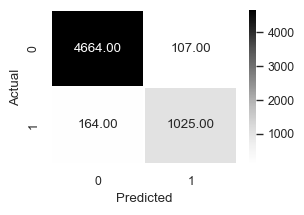

,model_id,Data,f1-score,precision,recall,timelapsed
12,F:RandomF_Tuned,Final,0.927504,0.935754,0.919821,1686617356.937375
11,6:RandomF Tuned,Test,0.859922,0.883639,0.840983,1657.522707
10,6:RandomF Tuned,Train,0.948906,0.951809,0.946074,1657.000362
9,5:RandomF Orig,Test,0.851847,0.901615,0.819069,1.649158
8,5:RandomF Orig,Train,1.000000,1.000000,1.000000,1.161915
7,4:DTree Tuned,Test,0.805656,0.793018,0.821334,11.547906
6,4:DTree tuned,Train,0.877633,0.857517,0.904113,11.109076
5,3:DTree Orig,Test,0.787739,0.795374,0.780881,0.699065
4,3:DTree Orig,Train,1.000000,1.000000,1.000000,0.078837
3,2:LogisticR tuned,Test,0.663578,0.653599,0.712636,0.976619


In [345]:
Y_final = rf_estimator_tuned_base.predict(X_scaled)
metrics_df = metrics_score(metrics_df, 'F:RandomF_Tuned','Final',Y, Y_final,0)
metrics_df.iloc[::-1].style.apply(lambda x: ['background: lightgreen' if (x.name == 12) else '' for i in x], axis=1)

<div style="background-image: linear-gradient(white, rgb(10,289,55), rgb(300,289,155));font-family: 'Segoe UI';font-size:'25'">

You can see    
    
> **Final** model gave us f1-scores of  approx **_.93_**  whis is very good. 

<div style="background-image: linear-gradient(white, rgb(10,289,55), rgb(300,289,155));font-family: 'Segoe UI';font-size:'25'">



### Recommendations

The **BANK,** should develop strategies based on feature **_importances_** and **_insights_** to minimize the risk of future loan defaults.

1. The **FINAL** selected model gave us a f1-score of **_.93_**, on which we can rely on future loan default predictions and
    > bank to use these insights to minimize loan default rate.  
    > Bank can integrate this model into their **_workflow_**.  
  
2. **DEBTINC:** This feature holds the **_highest_** importances on loan defult prediction in both Tree and RF model.  
    Customers with higher ratio will most likely to default.   
  > Therefore, the bank may  consider **_lowering_** the threshhold a bit to approve the loan.    

3. **DELINQ:**   This feature holds the _2nd highest_ importances on loan defult prediction in both Tree and RF model.  
    Customer with higher number of missed repayment are more likely to default on LOAN. 
  > Therefore, for such applications the bank may need to look at current job , debt to income ratio to approve the LOAN. 
    
4. **CLAGE:** This feature holds the _3rd highest_ importances on loan defult prediction in both Tree and RF model.  
    Customer with higher credit line age are less likely to default on LOAN. 
  > Therefore, for such applications the bank may  should give **_preference_** to approve the loan.     
       
5. **LOAN:**   Loan amount should be lower for **_self employed_** applicants as they have **_higher_** defualt rate.  
6. **JOB_ProfExe,JOB_Office:** _Professional executives_ and people with _Office_ jobs have **_better_** at repaying the loan.
   > Therefore, bank may need consider them as **_high valued_** customers and to develop _stategies to **_reachout more_**   
     and address their loan needs. 
7. **JOB_Self, JOB_Sales** "Self employed" and customers with "sales" job have the highest default rate. 
   > Therefore, for such applications the bank may need more **_scrutiny_** before approving loan. Bank may need to look at number of missing payments, credit line age and debt to income ratio before approving loan.   
   > The bank may lower the loan amount for self/sales employed. 
8. **REASON_HomeImp, REASON_DebtCon** , Loans on _"home improvement"_ has higher defualt rate compared to loans on _"debt consolidation"_. 
   > Bank may consider allocating **_more_** money for _"debt consolidation"_. 

<div style="background-image: linear-gradient(white,rgb(300,189,155));font-family: 'Segoe UI';font-size:'25'">

>> # THE END 